<h1 style="text-align:center;font-size:30px;" > Mercari Price Suggestion Challenge </h1>

<h1> 1. Business Problem </h1>

Predicting the price of a product is a tough challenge since very similar products having minute differences such as different brand name, additional specifications, quality of the product, demand of the product, etc. can have very different prizes. Clothing has strong seasonal pricing trends and is heavily influenced by brand names, while electronics have fluctuating prices based on product specs.

Price prediction gets even more difficult when there is a huge range of products, which is common with most of the online shopping platforms. While it might be simpler to predict the price of a particular category of products using some simple criteria, it’s highly challenging to predict the price of almost anything that is listed on online platforms. We may have multiple listings of the same product by a large number of sellers priced differently.

Mercari is Japan’s biggest community-powered shopping app.In this competition, Mercari’s challenge is to build an algorithm that automatically suggests the right product prices.

> Credits: Kaggle 




__ Problem Statement __

-> we will be predicting the sale price of a item based on information a user provides for this item.

-> The predicted price is suggested to the user when an item is listed, so that user can come to an conclusion about the item.

<h2> Real world/Business Objectives and Constraints </h2>

Objectives:

 

*   Predict the price of an item given its condition, decsription and other related features.

*   Minimize the difference between predicted and actual price.




<h1>2. Machine Learning Probelm </h1>

<h2> 2.1 Data </h2>

-> Get the data from : https://www.kaggle.com/c/mercari-price-suggestion-challenge/data

-> Data has two files: train.tsv and test_stg2.tsv

-> It contains 8 columns: 7 features and a target feature


<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

It is a Regression Problem, for given item's features we have to predict the price of an item.

<h3> 2.2.2 Performance Metric </h3>


RMSLE (Root Mean Square Logarithmic Error)

<h3> 2.2.3 Machine Learning Objective and Constraints </h3>

Minimise the value of RMSLE

Downloading the data:

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/7559/44327/train.tsv.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1597050084&Signature=M5wUQ0Wj16eEK1ujDnzFqCNFPSnHkTRzaQzeA9Ebhob3OsmDfRKjto7NWpEAVA2uplzAQURdVcdGAVU3CCVCj7JLEkV6cle4k6J60SHndP4HhkPCX96h6wMj6rknThcbo%2FPKjRrovlS%2F7GtiBreXDZpjRgKfG%2BsmM2hQXSwQz67THYkw2N%2FMUkcqva%2FO7%2BxyaIaO961vPjv%2Bdt5vH8ANiAA4shhzcjzWYp4OTknzUnvf7eEdrLyvcFOvKFCRQSzO%2BC0ml7RfXozdSp0DBY5M5o%2FTk1nsLzXYvDV%2FXtZ9EYysXBy%2FmnC7lgJLPWGHYiSTXwyytnlqonniOBrdwYiRmg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.tsv.7z" -c -O 'train.tsv.7z'

--2020-08-07 09:01:41--  https://storage.googleapis.com/kagglesdsdata/competitions/7559/44327/train.tsv.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1597050084&Signature=M5wUQ0Wj16eEK1ujDnzFqCNFPSnHkTRzaQzeA9Ebhob3OsmDfRKjto7NWpEAVA2uplzAQURdVcdGAVU3CCVCj7JLEkV6cle4k6J60SHndP4HhkPCX96h6wMj6rknThcbo%2FPKjRrovlS%2F7GtiBreXDZpjRgKfG%2BsmM2hQXSwQz67THYkw2N%2FMUkcqva%2FO7%2BxyaIaO961vPjv%2Bdt5vH8ANiAA4shhzcjzWYp4OTknzUnvf7eEdrLyvcFOvKFCRQSzO%2BC0ml7RfXozdSp0DBY5M5o%2FTk1nsLzXYvDV%2FXtZ9EYysXBy%2FmnC7lgJLPWGHYiSTXwyytnlqonniOBrdwYiRmg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.tsv.7z
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 77912192 (74M) [application/x-7z-compressed]
Saving to: ‘train.tsv.7z’

train.tsv.7z        100%[====

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/7559/44327/test_stg2.tsv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1597050107&Signature=U%2Fw1AX1XDpdTP%2B%2F%2BgUb7J1RBMh1sEHORpgacJmlyB5eLZfu2T5qYRXdMTFF00cqu9JAeFHdxlvmQxe4sG4bNbjcaTXUB8tS5bSL5rFK5psQDwTbd54zk9Cf6%2BtZ46lZYRGFmFdD3TEYvNbS7HKJVD2DmmEWYQiAaNg56dkAa4QF83q%2FDQafvDLkBcmc6HuWU%2BqOW7AjXXtDd1ZOasW%2BaUA8rN3QfhvAKINRwvkUtU0NDgWxOFSNNndg0sVu13rtvs84Q3ldi%2B%2FVkn4YXB13m7j2FkTGWZixzuvZX1KyE%2FLpxpLqlqWePk%2FI10I6IlT9hIqhr1bnde%2FdtJ3MQQCEiow%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest_stg2.tsv.zip" -c -O 'test_stg2.tsv.zip'

--2020-08-07 09:02:10--  https://storage.googleapis.com/kagglesdsdata/competitions/7559/44327/test_stg2.tsv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1597050107&Signature=U%2Fw1AX1XDpdTP%2B%2F%2BgUb7J1RBMh1sEHORpgacJmlyB5eLZfu2T5qYRXdMTFF00cqu9JAeFHdxlvmQxe4sG4bNbjcaTXUB8tS5bSL5rFK5psQDwTbd54zk9Cf6%2BtZ46lZYRGFmFdD3TEYvNbS7HKJVD2DmmEWYQiAaNg56dkAa4QF83q%2FDQafvDLkBcmc6HuWU%2BqOW7AjXXtDd1ZOasW%2BaUA8rN3QfhvAKINRwvkUtU0NDgWxOFSNNndg0sVu13rtvs84Q3ldi%2B%2FVkn4YXB13m7j2FkTGWZixzuvZX1KyE%2FLpxpLqlqWePk%2FI10I6IlT9hIqhr1bnde%2FdtJ3MQQCEiow%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest_stg2.tsv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.28.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308669128 (294M) [application/zip]
Saving to: ‘test_stg2.tsv.zip’

test_stg2.tsv.zip   10

Extracting train and test files

In [ ]:
!pip install pyunpack
!pip install patool

     |████████████████████████████████| 81kB 3.4MB/s 


In [ ]:
from pyunpack import Archive
Archive('train.tsv.7z').extractall("/content/")
Archive('test_stg2.tsv.zip').extractall("/content/")

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import shutil
import datetime
import gc
from tqdm import tqdm

import pandas as pd
import numpy as np
from numpy import median

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn.manifold import TSNE
from sklearn import preprocessing

from collections import Counter

import string
import re
from nltk.corpus import stopwords

import scipy
from scipy import hstack

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from sklearn.linear_model import Ridge

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import log_loss

from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from sklearn.feature_selection.univariate_selection import SelectKBest, f_regression

### Loading train data

In [ ]:
#j = pd.read_csv('train.tsv') #tried to read the data directly but faced with an error: Error tokenizing data. C error: Expected 1 fields in line 4, saw 2
#resolved by using seperator 
#https://stackoverflow.com/a/29383624
train = pd.read_csv('train.tsv', sep='\t')
print("shape of train data:",train.shape)
train.head()

shape of train data: (1482535, 8)


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [ ]:
train.info() #details of train data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB


In [ ]:
#Describe the train data
train.describe()

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


### Loading test data

In [ ]:
test = pd.read_csv('test_stg2.tsv', sep='\t')
print("shape of test data:",test.shape)
test.head()

shape of test data: (3460725, 7)


,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,NaN,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,NaN,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,NaN,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,NaN,1,Rediscovering life after the loss of a loved o...


In [ ]:
test.info() #details of test data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3460725 entries, 0 to 3460724
Data columns (total 7 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   test_id            int64 
 1   name               object
 2   item_condition_id  int64 
 3   category_name      object
 4   brand_name         object
 5   shipping           int64 
 6   item_description   object
dtypes: int64(3), object(4)
memory usage: 184.8+ MB


In [ ]:
test.describe() #describe test data

,test_id,item_condition_id,shipping
count,3.460725e+06,3.460725e+06,3.460725e+06
mean,1.730362e+06,1.907012e+00,4.477068e-01
std,9.990254e+05,9.036678e-01,4.972580e-01
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,8.651810e+05,1.000000e+00,0.000000e+00
50%,1.730362e+06,2.000000e+00,0.000000e+00
75%,2.595543e+06,3.000000e+00,1.000000e+00
max,3.460724e+06,5.000000e+00,1.000000e+00


**Observation:** From train and test data describe(), we can observe that the range of values corresponding to the columns of both datasets are nearly same,at this first glance we can say that they alomst have equal distributions of data.

## Data Overview

###Checking for duplicate rows

In [ ]:
train[train.duplicated()]

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description


**observation:** empty dataframe indicates that there are no duplicate rows

#### Checking for missing values

In [ ]:
train.isnull().any() #for train data

train_id             False
name                 False
item_condition_id    False
category_name         True
brand_name            True
price                False
shipping             False
item_description      True
dtype: bool

In [ ]:
test.isnull().any() #for test data

test_id              False
name                 False
item_condition_id    False
category_name         True
brand_name            True
shipping             False
item_description      True
dtype: bool

**observation:** we can observe that Category_name, brand_name and item_description columns have null values, so replace values of category with 'others', brand with 'unknown', description with 'not given'

In [ ]:
#replace train and test data values of category with others, brand with unknown, description with not given
train.category_name.fillna(value = "others", inplace = True) 
train.brand_name.fillna(value = "unknown", inplace = True)
train.item_description.fillna(value = "not given", inplace = True)
test.category_name.fillna(value = "others", inplace = True)
test.brand_name.fillna(value = "unknown", inplace = True)
test.item_description.fillna(value = "not given", inplace = True)

In [ ]:
train.isnull().any() #cross checking after filling all the missing values for train data

train_id             False
name                 False
item_condition_id    False
category_name        False
brand_name           False
price                False
shipping             False
item_description     False
dtype: bool

In [ ]:
test.isnull().any() #for test data

test_id              False
name                 False
item_condition_id    False
category_name        False
brand_name           False
shipping             False
item_description     False
dtype: bool

In [ ]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,unknown,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,unknown,44.0,0,Complete with certificate of authenticity


In [ ]:
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,unknown,1,Size 7
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,unknown,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined..."
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,unknown,0,-floral kimono -never worn -lightweight and pe...
4,4,Life after Death,3,Other/Books/Religion & Spirituality,unknown,1,Rediscovering life after the loss of a loved o...


**observation:** we can see that all null values are replaced

## EDA

## Univariate Analysis

### Price

In [ ]:
#details of price
train.price.describe()

count    1.482535e+06
mean     2.673752e+01
std      3.858607e+01
min      0.000000e+00
25%      1.000000e+01
50%      1.700000e+01
75%      2.900000e+01
max      2.009000e+03
Name: price, dtype: float64

**observation:** The maximum price of an item is 2009 whereas minimum price is 0.

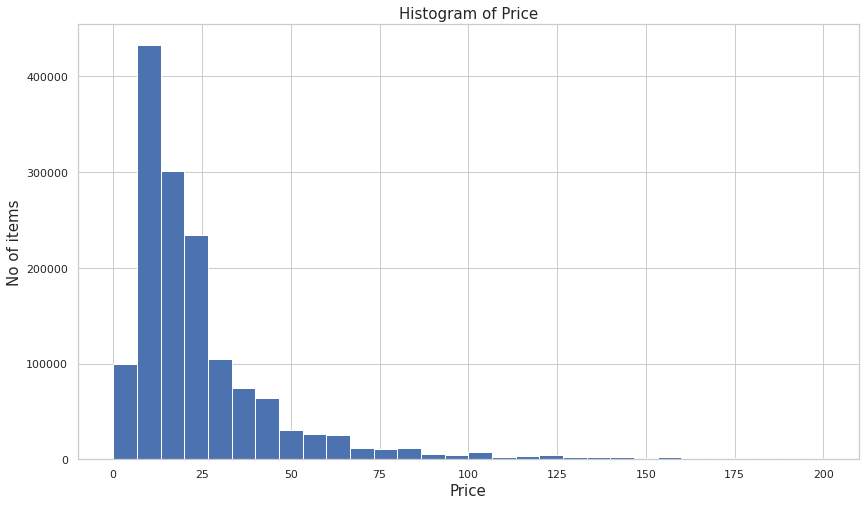

In [ ]:
#plotting histogram for price in range of values less than 200
p = train['price'].hist(bins=30,range=[0,200],label="Price",figsize=(14,8))
plt.title('Histogram of Price', fontsize=15)
p.set_xlabel('Price',fontsize=15)
p.set_ylabel('No of items',fontsize=15)
plt.show()

**observation:** we can see that most of the items have their prices between 5-20.

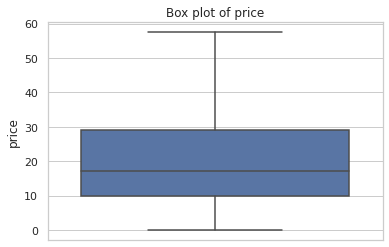

In [ ]:
sns.boxplot(y='price', data=train, showfliers=False)
plt.title('Box plot of price')
plt.show()

**observation:** can't infer much, let's explore more using percentiles

In [ ]:
for i in range(0, 101, 10):
    var =train["price"].values
    print("{} percentile value is {}".format(i,np.percentile(var,i)))

0 percentile value is 0.0
10 percentile value is 7.0
20 percentile value is 10.0
30 percentile value is 12.0
40 percentile value is 14.0
50 percentile value is 17.0
60 percentile value is 20.0
70 percentile value is 26.0
80 percentile value is 34.0
90 percentile value is 51.0
100 percentile value is 2009.0


In [ ]:
for i in range(90, 101):
    var =train["price"].values
    print("{} percentile value is {}".format(i,np.percentile(var,i)))

90 percentile value is 51.0
91 percentile value is 55.0
92 percentile value is 58.0
93 percentile value is 62.0
94 percentile value is 67.0
95 percentile value is 75.0
96 percentile value is 85.0
97 percentile value is 99.0
98 percentile value is 122.0
99 percentile value is 170.0
100 percentile value is 2009.0


**observation:** we can see that 99% of the price values are less than 170

## shipping

In [ ]:
print("shpping :1 if shipping fee is paid by seller and 0 by buyer")
print("number of 1's and 0's",train['shipping'].value_counts())

shpping :1 if shipping fee is paid by seller and 0 by buyer
number of 1's and 0's 0    819435
1    663100
Name: shipping, dtype: int64


In [ ]:
seller_paid = [] #getting the values of prices paid by sellers
buyer_paid = [] #getting the values of prices paid by buyers
for i in tqdm(range(0,len(train['shipping']))):
    if train['shipping'][i]==1:
        seller_paid.append(train['price'][i])
    else:
        buyer_paid.append(train['price'][i])
print(len(seller_paid))
print(len(buyer_paid))

100%|██████████| 1482535/1482535 [01:36<00:00, 15357.34it/s]

663100
819435


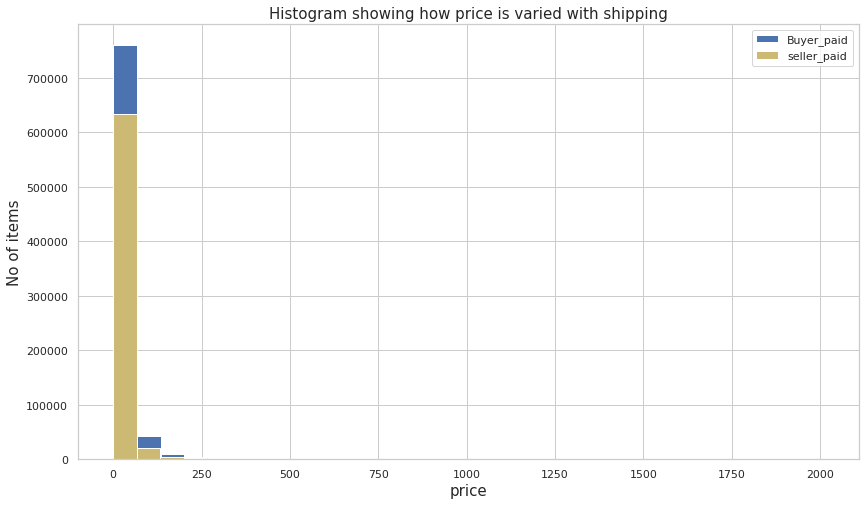

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
#https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.hist.html
ax.hist(buyer_paid,bins=30,label="Buyer_paid",color='b')
ax.hist(seller_paid,bins=30,label="seller_paid",color='y')
plt.title('Histogram showing how price is varied with shipping', fontsize=15)
ax.set_xlabel('price',fontsize=15)
ax.set_ylabel('No of items',fontsize=15)
plt.legend(loc='upper right')

plt.show()

**observation:** can't infer much lets zoom in and check it, as 99%ile is 170,lets see price range upto 170

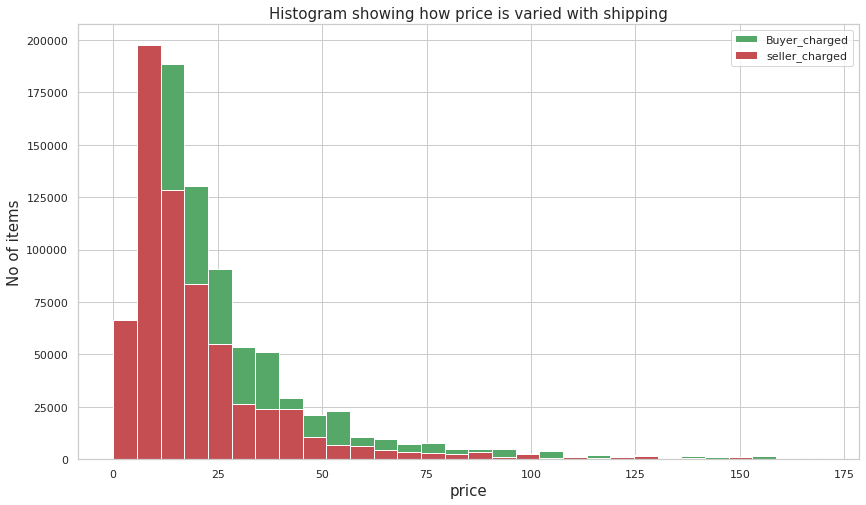

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
#https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.hist.html
ax.hist(buyer_paid,bins=30,range=[0,170],label="Buyer_paid",color='g')
ax.hist(seller_paid,bins=30,range=[0,170],label="seller_paid",color='r')
plt.title('Histogram showing how price is varied with shipping', fontsize=15)
ax.set_xlabel('price',fontsize=15)
ax.set_ylabel('No of items',fontsize=15)
plt.legend(loc='upper right')

plt.show()

**Observation:** From the histogram it seems that for smaller prices,seller is paying shipping fee and as price of item is increasing, buyer is charged with shipping fee,but there are some instances where the opposite is also true.

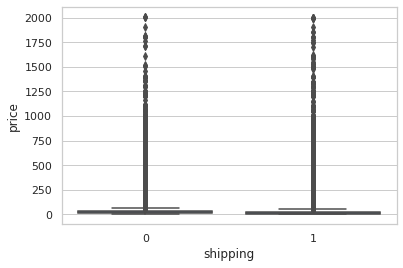

In [ ]:
#Boxplot shipping vs Price
sns.boxplot(x=train.shipping,y=train.price)

**observation:** As stated earier,same can be inferred from box plot above,so cant conclude the statement : if buyer is paying the price then it is high.

## item condition

In [ ]:
print("category and its number of occurences:")
train.item_condition_id.value_counts()

category and its number of occurences:


1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64

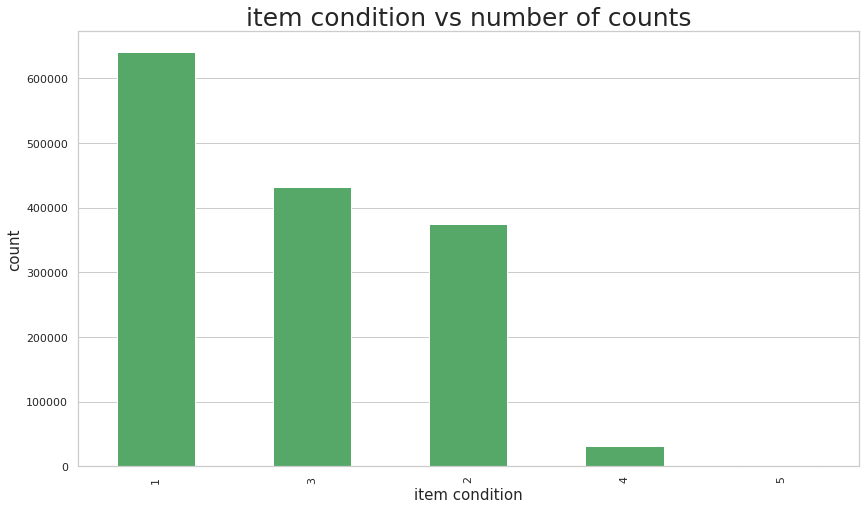

In [ ]:
plt.figure(figsize=[14,8])
train.item_condition_id.value_counts().plot(kind='bar',color='g')
plt.title('item condition vs number of counts',fontsize=25)
plt.xlabel('item condition',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.grid(False, axis='x')
plt.show()

**observation:** Items with condition id '1' are more in number.

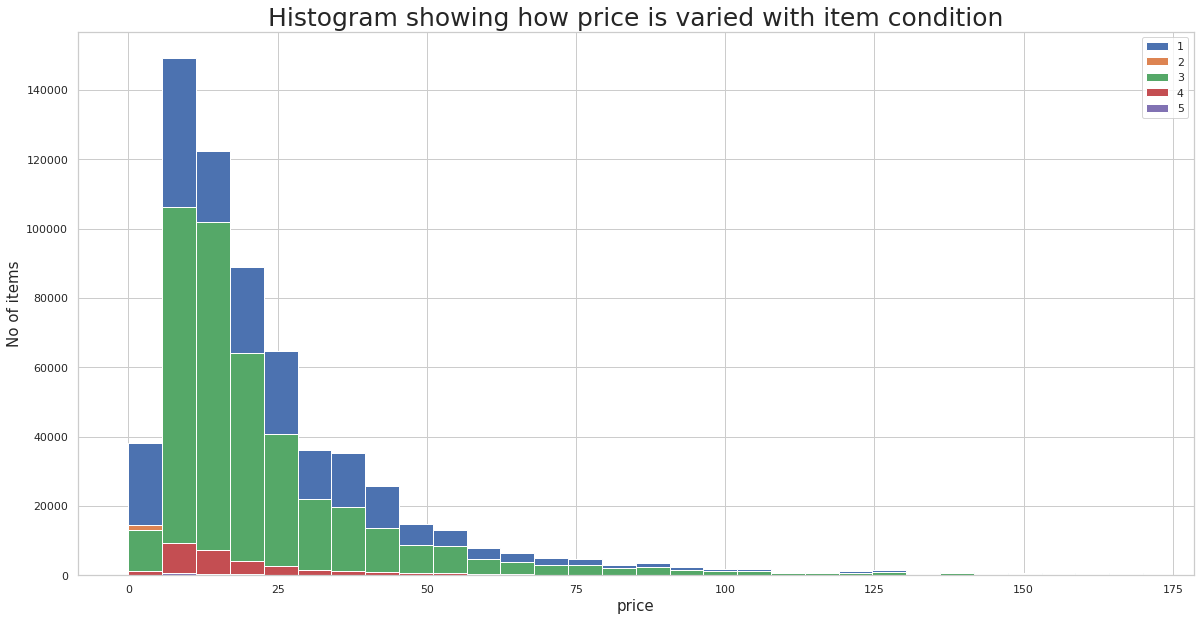

In [ ]:
g = train.groupby('item_condition_id')
fig, ax = plt.subplots(figsize=(20,10))
for item_id,df in g:
  ax.hist(df['price'],bins=30,range=[0,170],label=str(item_id))
plt.title('Histogram showing how price is varied with item condition', fontsize=25)
ax.set_xlabel('price',fontsize=15)
ax.set_ylabel('No of items',fontsize=15)
plt.legend(loc='upper right')
plt.show()

**Observation:**Item condition id  1 and 3 are distributed more than the remaining, and also as price increases,we can only see the item conditions of 1 and 3,this can implies that even though the item condtion is not good,price is high,so those items may be of electronics category.

In [ ]:
train.groupby('item_condition_id')['price'].describe() #details of the items corresponding to their condition status and price

,count,mean,std,min,25%,50%,75%,max
item_condition_id,,,,,,,,
1,640549.0,26.486967,35.418024,0.0,10.0,18.0,30.00,2009.0
2,375479.0,27.563225,42.125698,0.0,11.0,17.0,29.00,2004.0
3,432161.0,26.540711,40.030681,0.0,11.0,16.0,28.00,2000.0
4,31962.0,24.349212,35.679148,0.0,10.0,15.0,26.00,1309.0
5,2384.0,31.703859,39.531069,0.0,11.0,19.0,35.25,522.0


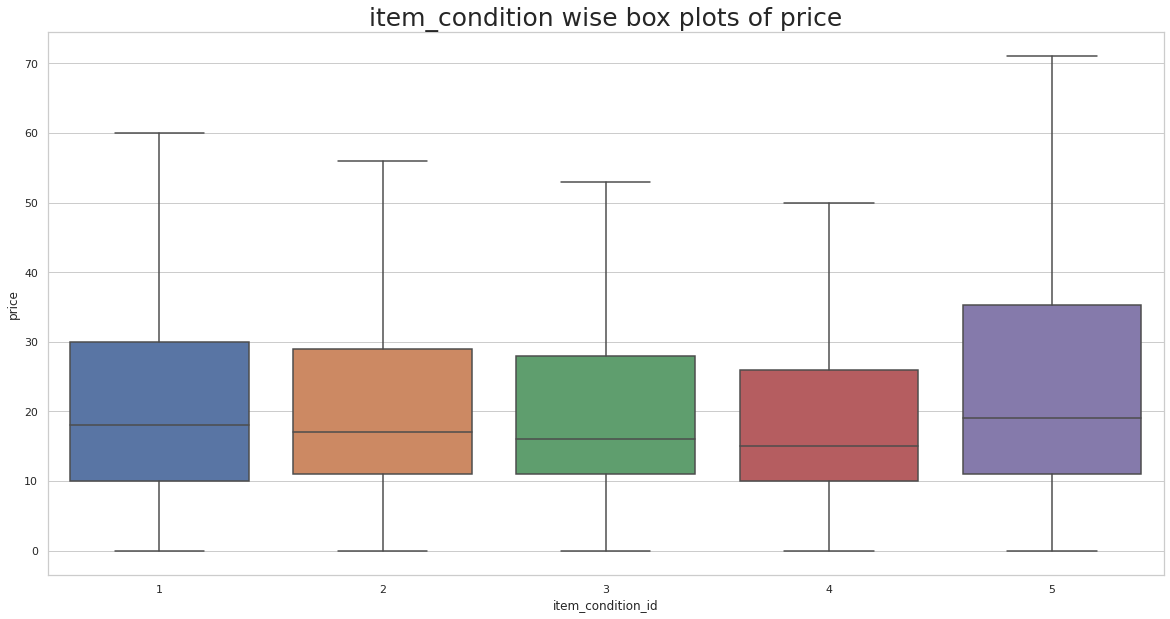

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x='item_condition_id', y='price', data=train, showfliers=False)
plt.title('item_condition wise box plots of price',fontsize=25)
plt.show()

**observation**: We can see that as condition of item improves, average price is increasing, which is normal that good condition item is charged more and we can also observe that even though items condition is decreasing from 5 to 1, 75%ile values and maximum prices of those is increasing,(may be those maximum prices are of some costly electronic items), so cant conclude the statement : if item condition id is more,item price is more.

## Item category

In [ ]:
print("No of unique values in item category is:",train['category_name'].nunique())

No of unique values in item category is: 1288


In [ ]:
print("Top-10 unique category by frequency:\n\n",train['category_name'].value_counts()[:10])

Top-10 unique category by frequency:

 Women/Athletic Apparel/Pants, Tights, Leggings                 60177
Women/Tops & Blouses/T-Shirts                                  46380
Beauty/Makeup/Face                                             34335
Beauty/Makeup/Lips                                             29910
Electronics/Video Games & Consoles/Games                       26557
Beauty/Makeup/Eyes                                             25215
Electronics/Cell Phones & Accessories/Cases, Covers & Skins    24676
Women/Underwear/Bras                                           21274
Women/Tops & Blouses/Blouse                                    20284
Women/Tops & Blouses/Tank, Cami                                20284
Name: category_name, dtype: int64


Seperating categories and sub categories from category name column

In [ ]:
#Extract categories and subcategories
def split_row(i):
    try: #if categoey names are not mull or not missing values
        t = i
        t1, t2, t3 = i.split('/')
        return t1, t2, t3
    except: #if category values are null, we already replaced them with others,so these 'others' wont have any subcategories, so just replace the 'others' with 'label not given'(because there is an another main category with name 'other' and it has subcategories)
        return ("not given", "not given", "not given")

In [ ]:
train['main_cat'], train['sub_cat1'], train['sub_cat2'] = zip(*train['category_name'].apply(lambda x: split_row(x))) #new columns with main category and 2 sub categories
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,main_cat,sub_cat1,sub_cat2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,unknown,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,unknown,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [ ]:
test['main_cat'], test['sub_cat1'], test['sub_cat2'] = zip(*test['category_name'].apply(lambda x: split_row(x)))
test.head()

,test_id,name,item_condition_id,category_name,brand_name,shipping,item_description,main_cat,sub_cat1,sub_cat2
0,0,"Breast cancer ""I fight like a girl"" ring",1,Women/Jewelry/Rings,unknown,1,Size 7,Women,Jewelry,Rings
1,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers",1,Other/Office supplies/Shipping Supplies,unknown,1,"25 pcs NEW 7.5""x12"" Kraft Bubble Mailers Lined...",Other,Office supplies,Shipping Supplies
2,2,Coach bag,1,Vintage & Collectibles/Bags and Purses/Handbag,Coach,1,Brand new coach bag. Bought for [rm] at a Coac...,Vintage & Collectibles,Bags and Purses,Handbag
3,3,Floral Kimono,2,Women/Sweaters/Cardigan,unknown,0,-floral kimono -never worn -lightweight and pe...,Women,Sweaters,Cardigan
4,4,Life after Death,3,Other/Books/Religion & Spirituality,unknown,1,Rediscovering life after the loss of a loved o...,Other,Books,Religion & Spirituality


In [ ]:
print("for train data:")
print("No of unique values in main category: ",train['main_cat'].nunique())
print("No of unique values in Sub_category1: ",train['sub_cat1'].nunique())
print("No of unique values in Sub_category2: ",train['sub_cat2'].nunique())

for train data:
No of unique values in main category:  11
No of unique values in Sub_category1:  114
No of unique values in Sub_category2:  865


### main category

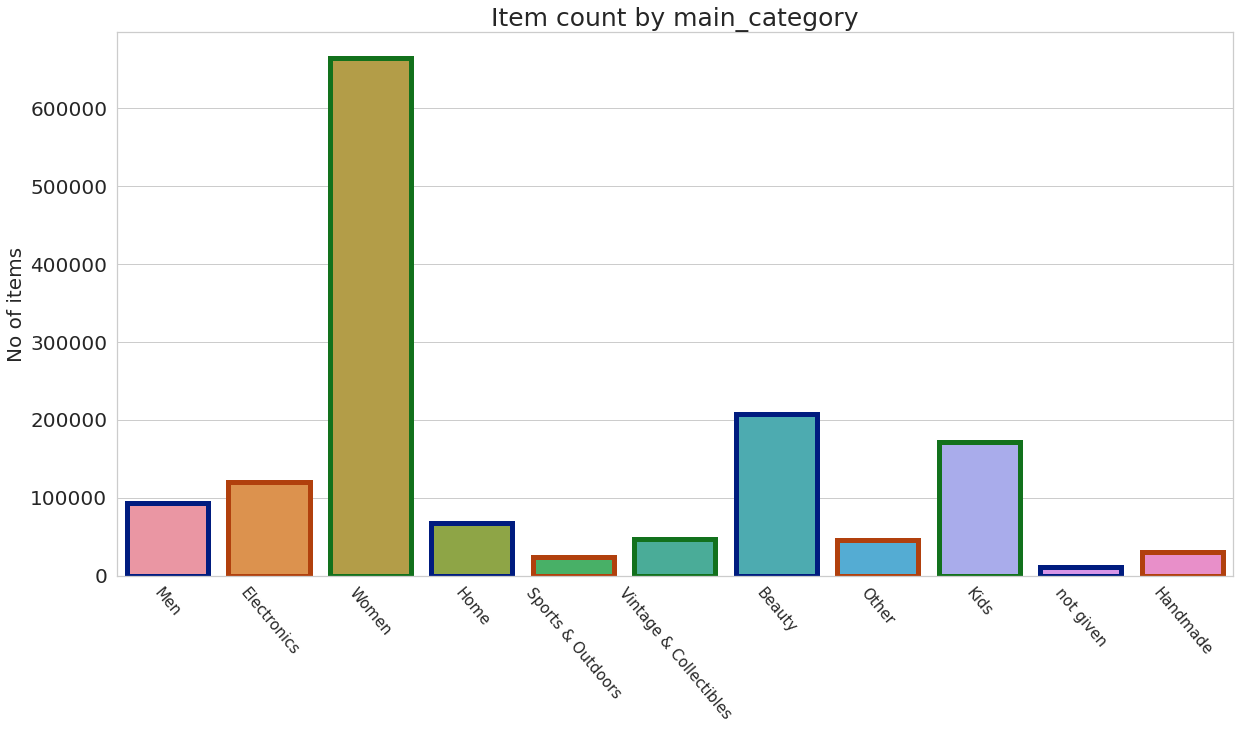

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='main_cat', data=train, ax=ax,linewidth=5,\
                   edgecolor=sns.color_palette("dark", 3))
plt.title('Item count by main_category',fontsize=25)
plt.ylabel('No of items',fontsize=20)
plt.xlabel('')
plt.xticks(rotation=310,fontsize=15)
plt.yticks(fontsize=20)
plt.show()

**observation:** Most of the items belong to 'women' category and next category is 'beauty' and 'kids

In [ ]:
cat_missing = train[train.main_cat=='not given'].shape[0]
print('main category name is missing for {} datapoints, i.e. {:.2f} % of train data.' .format(cat_missing, 100.0*cat_missing/train.shape[0]))

main category name is missing for 10716 datapoints, i.e. 0.72 % of train data.


In [ ]:
g = train.groupby('main_cat')
g.mean().index

Index(['Beauty', 'Electronics', 'Handmade', 'Home', 'Kids', 'Men', 'Other',
       'Sports & Outdoors', 'Vintage & Collectibles', 'Women', 'not given'],
      dtype='object', name='main_cat')

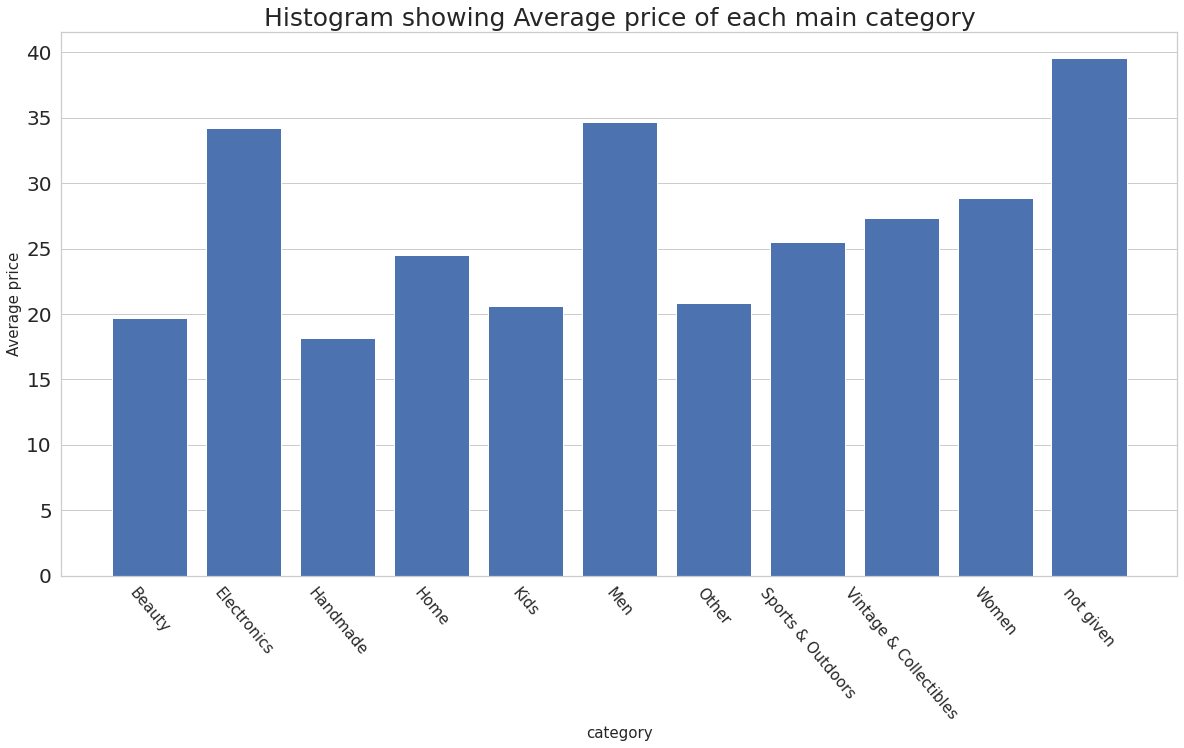

In [ ]:
g = train.groupby('main_cat')
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(g.mean().index,height = g.mean().price)
plt.title('Histogram showing Average price of each main category', fontsize=25)
plt.grid(False, axis='x')
ax.set_xlabel('category',fontsize=15)
ax.set_ylabel('Average price',fontsize=15)
plt.xticks(rotation=310,fontsize=15)
plt.yticks(fontsize=20)
plt.show()

**Observation:**The average price of Electronics and Men category is more apart from the unknown category.We can see that ther is clear seperation between the values,so this may be used as feature in our modelling.

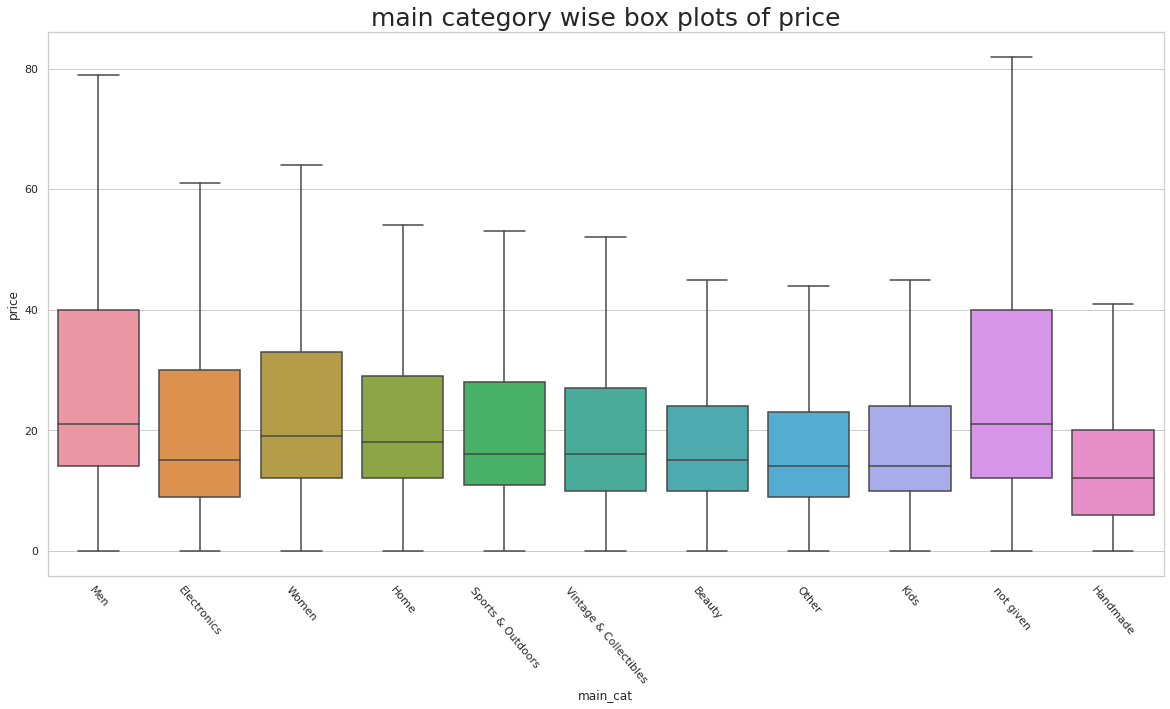

In [ ]:
plt.figure(figsize = (20,10))
sns.boxplot(y='price', x='main_cat', data=train, showfliers=False)
plt.xticks(rotation=310)
plt.title('main category wise box plots of price',fontsize=25)
plt.show()

**Observation:**We can see that the box plots are clearly variant relative to one another, so we can say that main category will contribute more to our prediction.

### subcategory-1

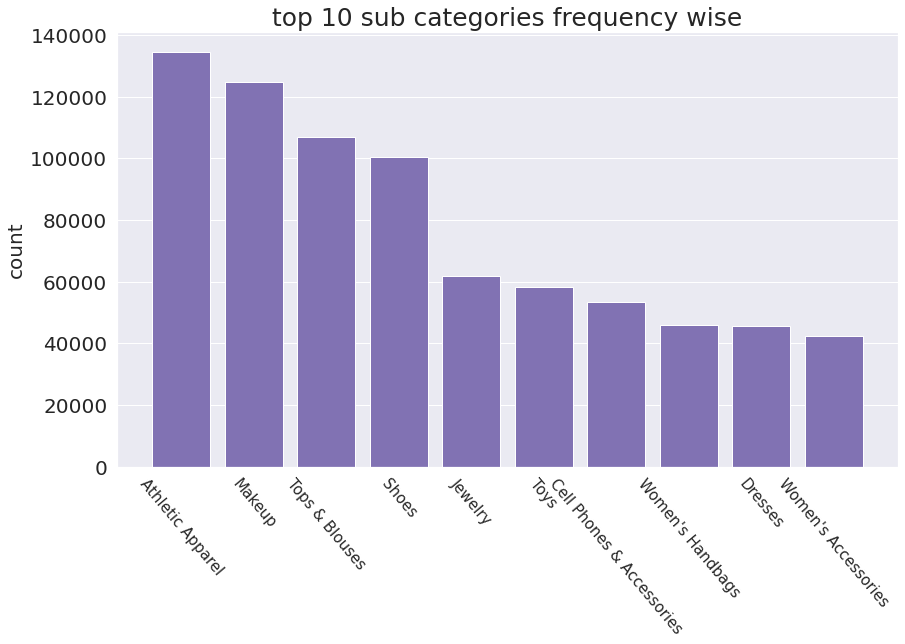

In [ ]:
plt.figure(figsize=[14,8])
plt.bar(train.sub_cat1.value_counts()[0:10].index,height = train.sub_cat1.value_counts()[0:10],color='m')
plt.title('top 10 sub categories frequency wise',fontsize=25)
plt.xlabel('')
plt.ylabel('count',fontsize=20)
plt.grid(False, axis='x')
plt.xticks(rotation=310,fontsize=15)
plt.yticks(fontsize=20)
plt.show()

**Observation:**We can see that the items realted to clothing and makeup are high in number in over all data and even accesories like jewelry,shoes..which are realted to fashion are more in number.

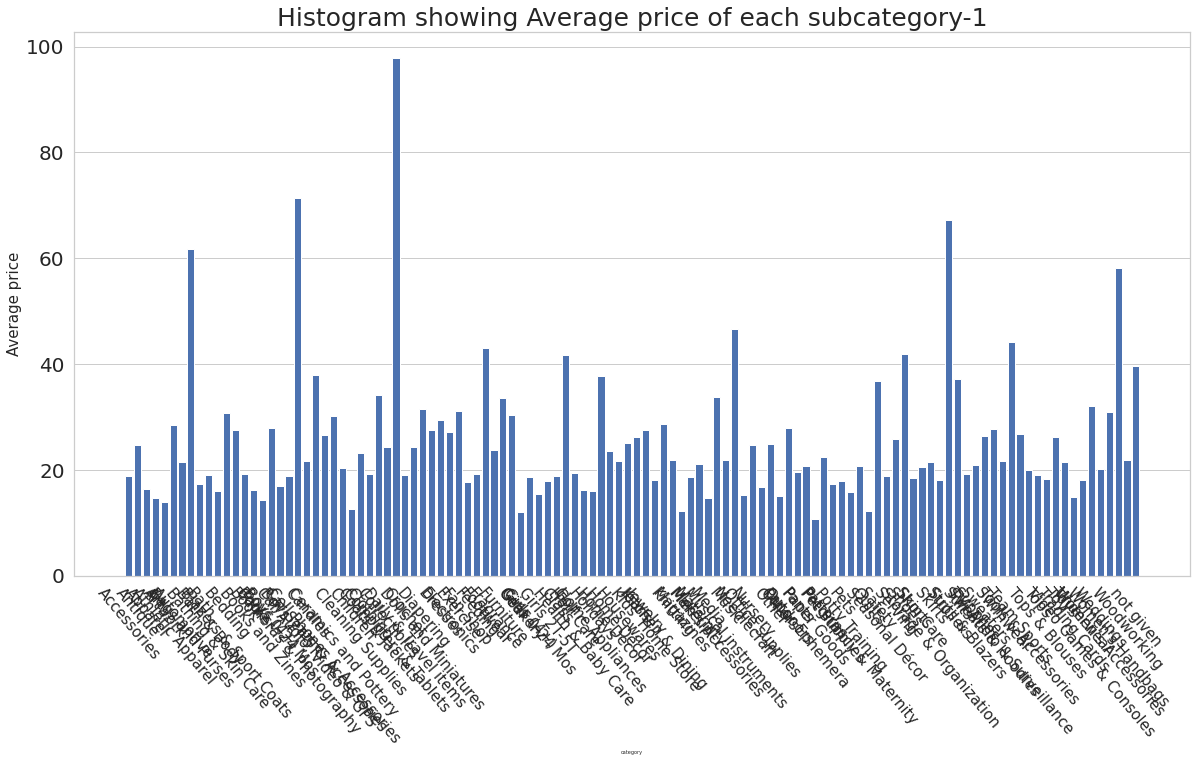

In [ ]:
g = train.groupby('sub_cat1')
fig, ax = plt.subplots(figsize=(20,10))
plt.bar(g.mean().index,height = g.mean().price)
plt.title('Histogram showing Average price of each subcategory-1', fontsize=25)
plt.grid(False, axis='x')
ax.set_xlabel('category',fontsize=5)
ax.set_ylabel('Average price',fontsize=15)
plt.xticks(rotation=310,fontsize=15)
plt.yticks(fontsize=20)
plt.show()

**Observation:** Seems that even though some sub categories have equal average prices, most of them are different, so this can be added as a feature in our data.

### subcategory-2

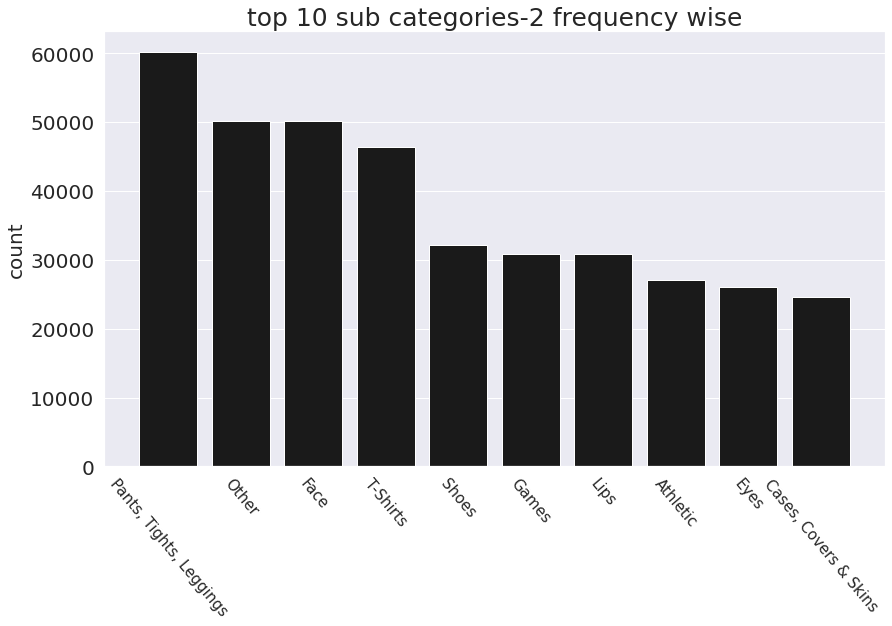

In [ ]:
plt.figure(figsize=[14,8])
plt.bar(train.sub_cat2.value_counts()[0:10].index,height = train.sub_cat2.value_counts()[0:10],color='k')
plt.title('top 10 sub categories-2 frequency wise',fontsize=25)
plt.xlabel('')
plt.ylabel('count',fontsize=20)
plt.grid(False, axis='x')
plt.xticks(rotation=310,fontsize=15)
plt.yticks(fontsize=20)
plt.show()

**Observation:**Even in subcategories the items realted to fashion and clothing are more in number.

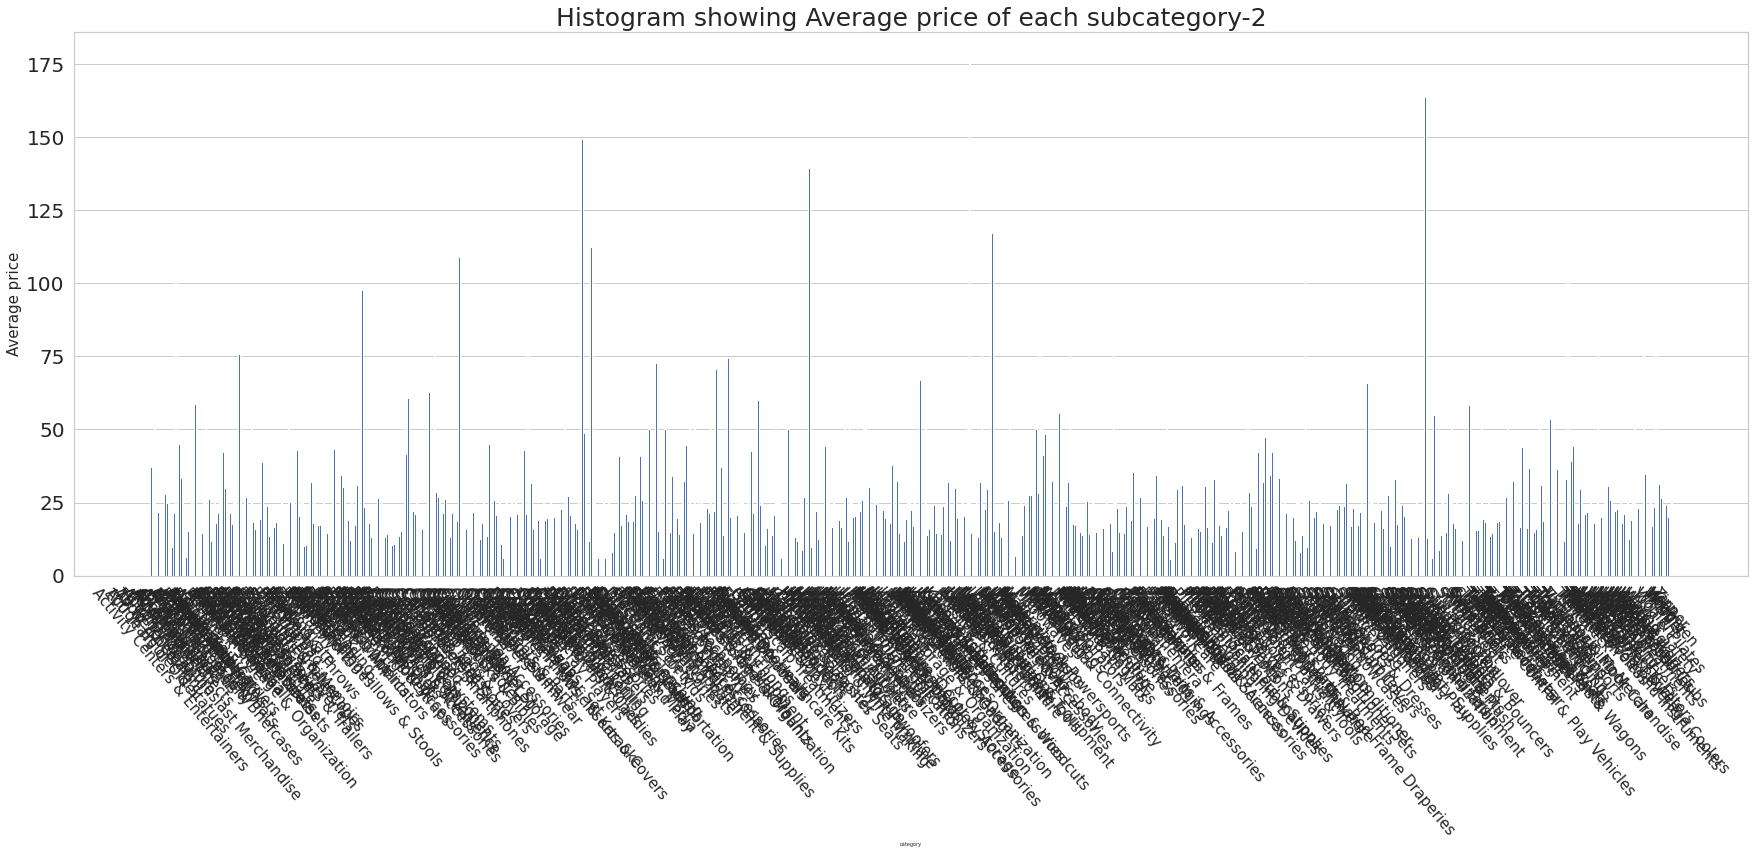

In [ ]:
g = train.groupby('sub_cat2')
fig, ax = plt.subplots(figsize=(30,10))
plt.bar(g.mean().index,height = g.mean().price)
plt.title('Histogram showing Average price of each subcategory-2', fontsize=25)
plt.grid(False, axis='x')
ax.set_xlabel('category',fontsize=5)
ax.set_ylabel('Average price',fontsize=15)
plt.xticks(rotation=310,fontsize=15)
plt.yticks(fontsize=20)
plt.show()

**observation:** We can observe that for main category, the price range of each category is different, which means that it will be play good role in predicting the price.We can also see that most of the items sold were related to clothing and also we have category names missing 0.72% of the total data.

## Brand name

In [ ]:
print("No of unique brands: ",train['brand_name'].nunique())

No of unique brands:  4810


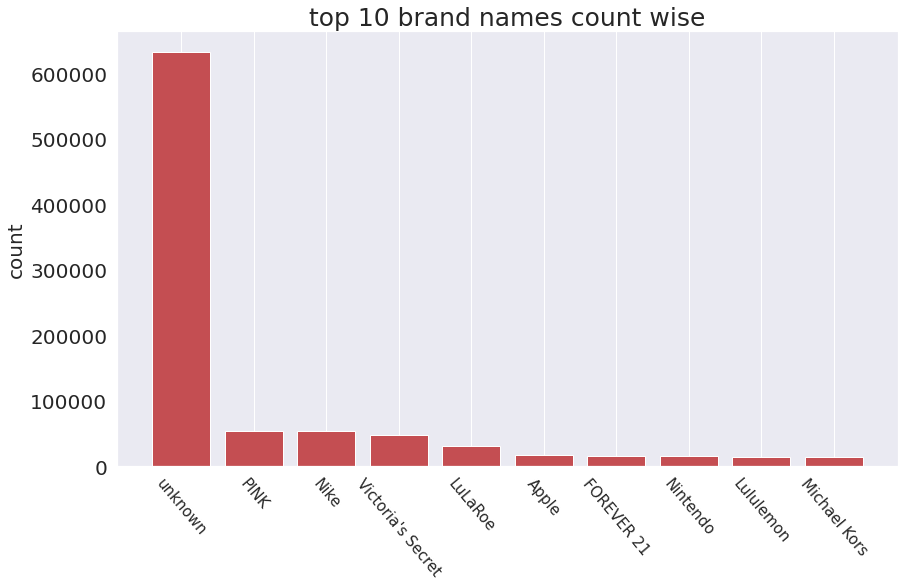

In [ ]:
plt.figure(figsize=[14,8])
plt.bar(train.brand_name.value_counts()[0:10].index,height = train.brand_name.value_counts()[0:10],color='r')
plt.title('top 10 brand names count wise',fontsize=25)
#plt.gca().invert_yaxis()
plt.xlabel('')
plt.ylabel('count',fontsize=20)
plt.grid(False, axis='y')
plt.xticks(rotation=310,fontsize=15)
plt.yticks(fontsize=20)
plt.show()

**observation:** we can see that for most of the items i.e. 42.68% of the total items, the brand name has not been listed. In the next place, most number of items have 'Pink' and "Nike" as brand names.

In [ ]:
brand_missing = train[train.brand_name=='unknown'].shape[0]
print('Brand name is missing for {} datapoints, i.e. {:.2f} % of train data.' .format(brand_missing, 100.0*brand_missing/train.shape[0]))

Brand name is missing for 632682 datapoints, i.e. 42.68 % of train data.


### Name

In [ ]:
train['name'].describe()

count     1482535
unique    1225273
top        Bundle
freq         2232
Name: name, dtype: object

In [ ]:
train['name']

In [ ]:
word_name = train['name'].str.split().apply(len).value_counts()

In [ ]:
word_name

4     313585
5     291636
3     287424
6     231559
2     161912
7     121641
8      35970
1      31620
9       6385
10       722
11        67
12         7
13         5
17         1
14         1
Name: name, dtype: int64

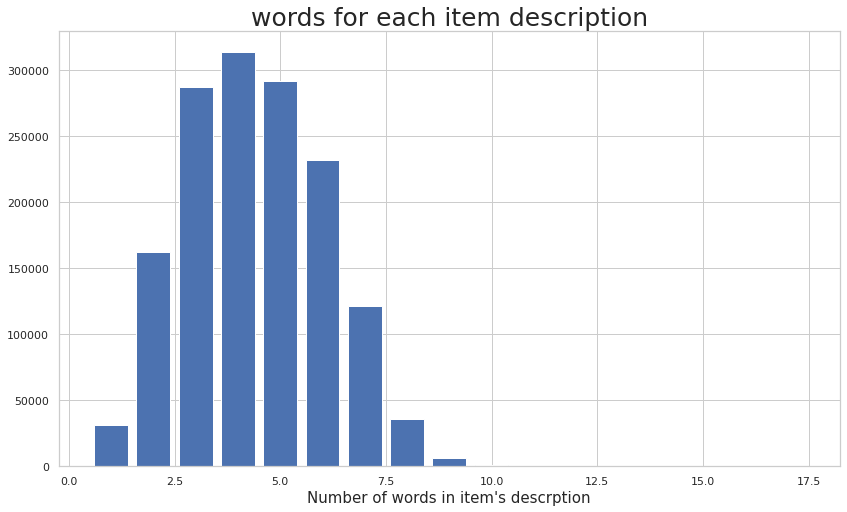

In [ ]:
plt.figure(figsize=(14,8))
plt.kde(word_name.index,height = word_name.values,)
plt.title("words for each item description",fontsize=25)
plt.xlabel("Number of words in item's descrption",fontsize=15)
plt.show()

**observation:** Most of the names are described in 2 to 6 words.

## Item description

In [ ]:
word_count = train['item_description'].str.split().apply(len).value_counts() #returns the number of words with the frequency 

In [ ]:
word_count#for example,there are 121909 sentences with number of words as 3

3      121909
6       55542
7       53822
8       53201
4       52640
        ...  
242         1
230         1
227         1
221         1
245         1
Name: item_description, Length: 228, dtype: int64

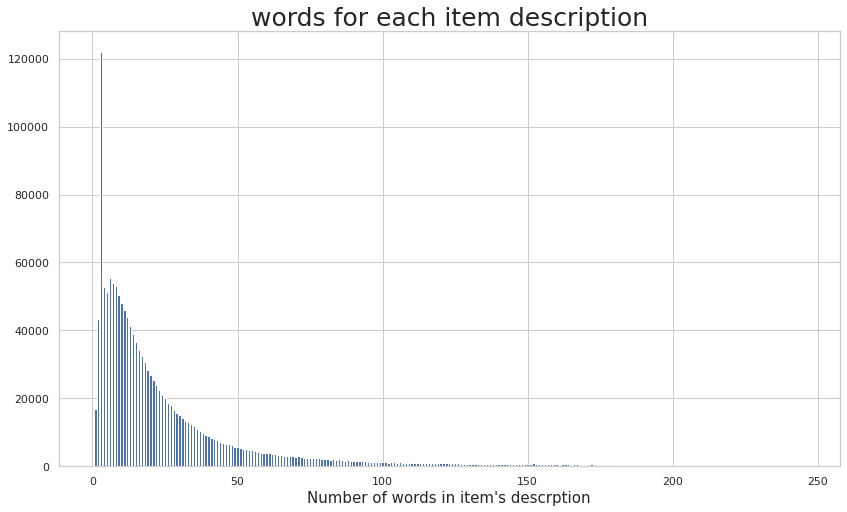

In [ ]:
plt.figure(figsize=(14,8))
plt.bar(word_count.index,height = word_count.values)
plt.title("words for each item description",fontsize=25)
plt.xlabel("Number of words in item's descrption",fontsize=15)
plt.show()

**observation:** From the distribution, we can see that  number words in item description are mostly less than 20.

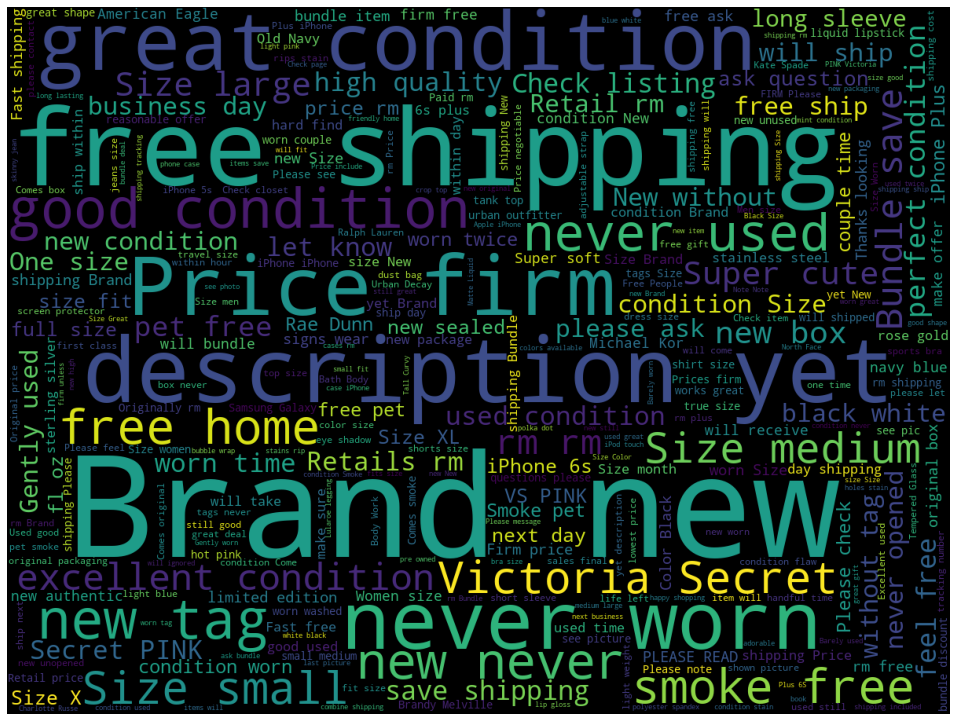

In [ ]:
from wordcloud import WordCloud
wc = WordCloud(max_words=300,width = 1200, height = 900).generate(" ".join(train.item_description.astype(str)))
plt.figure(figsize = (18, 13))
plt.imshow(wc)
plt.axis("off")
plt.show()

**observation:** From word frequencies plot, we can see that the words 'Brand' and 'new' occured many times in item description, which means that people are more considering about the brand and how 'new' the item is.

### Key observations from Exploratory Data Analysis:
1.Item's main category column seems as an important feature for prediction.

2.The word 'Brand' is occuring more frequently in item description,which means people are discussing more about Brand of the item.

3.For items whose price is less than 20,seller is charged with the shipping price and for rest of all the prices, buyer is going to pay the shipping price.

# Preprocessing of data

In [ ]:
train.drop('category_name', axis=1, inplace=True)#dropping category column as we seperated this cloumn to main and sub categories
test.drop('category_name', axis=1, inplace=True)

In [ ]:
train.head()

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_cat,sub_cat1,sub_cat2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,unknown,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,unknown,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [ ]:
train.shape

(1482535, 10)

### Categorical data

In [ ]:
def clean_cat(cat_column):
    '''takes categorical column values as arguments and returns list of cleaned categories'''
#cleaning is necessary because:
#we do each column analysis and remove if there are any special symbols like & and replace all those and spaces with '_',so that if we encounter any test data point with & symbol,it should not be treated as new point
#for example: if we train our model with computer&mobiles and if we encounter a category computer mobiles,while predicting model should not treat it as new category,so better do all analysis
#here we have 3 million test data points to test our model,so these one or two points may not significantly improve our test score,so that is why here we can exclude all the further analysis,but in real world, where each test point outcome is important we have to do all the detailed analysis
    cat = list(cat_column)
    cat_list = []
    for i in tqdm(cat):
        i = re.sub('[^A-Za-z0-9]+', ' ', i)
        i = i.replace(' ','_')
        i = i.replace('-','_')
        i = i.replace(' & ','_')
        i = i.lower()
        cat_list.append(i.strip())
    
    return cat_list

In [ ]:
train['brand_name'] = clean_cat(train['brand_name'].values)
test['brand_name'] = clean_cat(test['brand_name'].values)

train['main_cat'] = clean_cat(train['main_cat'].values)
test['main_cat'] = clean_cat(test['main_cat'].values)

train['sub_cat1'] = clean_cat(train['sub_cat1'].values)
test['sub_cat1'] = clean_cat(test['sub_cat1'].values)

train['sub_cat2'] = clean_cat(train['sub_cat2'].values)
test['sub_cat2'] = clean_cat(test['sub_cat2'].values)

100%|██████████| 3460725/3460725 [00:06<00:00, 554921.27it/s]


In [ ]:
train.head()

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,main_cat,sub_cat1,sub_cat2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,unknown,10.0,1,No description yet,men,tops,t_shirts
1,1,Razer BlackWidow Chroma Keyboard,3,razer,52.0,0,This keyboard is in great condition and works ...,electronics,computers_tablets,components_parts
2,2,AVA-VIV Blouse,1,target,10.0,1,Adorable top with a hint of lace and a key hol...,women,tops_blouses,blouse
3,3,Leather Horse Statues,1,unknown,35.0,1,New with tags. Leather horses. Retail for [rm]...,home,home_d_cor,home_d_cor_accents
4,4,24K GOLD plated rose,1,unknown,44.0,0,Complete with certificate of authenticity,women,jewelry,necklaces


### Text data

In [ ]:
import nltk
nltk.download('stopwords')
def preprocess_name(text_data):
    preprocessed_names = []
    for sentence in tqdm(text_data.values):
        sent = sentence.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        preprocessed_names.append(sent.lower().strip())
    return preprocessed_names

stopwords = stopwords.words('english')
def preprocess_text(text_data):
    preprocessed_txt = []
    for sentence in tqdm(text_data.values):
        sent = sentence.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        sent = ' '.join(e for e in sent.split() if e not in stopwords)
        preprocessed_txt.append(sent.lower().strip())
    return preprocessed_txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train['preprocessed_name'] = preprocess_name(train['name'])
test['preprocessed_name'] = preprocess_name(test['name'])

train['preprocessed_description'] = preprocess_text(train['item_description'])
test['preprocessed_description'] = preprocess_text(test['item_description'])

100%|██████████| 3460725/3460725 [03:03<00:00, 18834.76it/s]


In [ ]:
print("example after cleaning")
p = train['preprocessed_description'].values[5]
print(train['item_description'].values[5])
p

example after cleaning
Banana republic bottoms, Candies skirt with matching blazer,Amy Byers suit, Loft bottoms and cami top.


'banana republic bottoms candies skirt matching blazer amy byers suit loft bottoms cami top'

In [ ]:
train.drop(['name','item_description'], axis=1, inplace=True)
test.drop(['name','item_description'], axis=1, inplace=True)

In [ ]:
print("columns after cleaning:")
train.head()

columns after cleaning:


,train_id,item_condition_id,brand_name,price,shipping,main_cat,sub_cat1,sub_cat2,preprocessed_name,preprocessed_description
0,0,3,unknown,10.0,1,men,tops,t_shirts,mlb cincinnati reds t shirt size xl,no description yet
1,1,3,razer,52.0,0,electronics,computers_tablets,components_parts,razer blackwidow chroma keyboard,this keyboard great condition works like came ...
2,2,1,target,10.0,1,women,tops_blouses,blouse,ava viv blouse,adorable top hint lace key hole back the pale ...
3,3,1,unknown,35.0,1,home,home_d_cor,home_d_cor_accents,leather horse statues,new tags leather horses retail rm stand foot h...
4,4,1,unknown,44.0,0,women,jewelry,necklaces,24k gold plated rose,complete certificate authenticity


## Feature Engineering

### Hand picked features



*   **negative,positive,neutral,compound:**sentiment scores of item_description  
*   **name_len:**char length of sentence of name 
*   **name_words:**Number of words in each name
*   **item_len:**char length of item_description
*   **item_words:**Number of words in each item_description
*   **main_cat_count:**frequency of main_category
*   **subcat1_count:**frequency of sub caegory1
*   **subcat2_count:**frequrncy of sub_category2
*   **brand_name_count:**frequency of brand name
*   **condition_id_count:**frequency of item condition id
*   **name_item_len_ratio:**ratio of length of name to item description
*   **mean_brand_price:**mean price of items per brand
*   **mean_cat_price:**mean price of items per main category
*   **mean_subcat1_price:**mean price of items per subcategory1
*   **mean_subcat2_price:**mean price of items per subcategory2
*   **mean_cond_price:**mean price of items per item condition id
*   **median_brand_price:**median price of items per brand
*   **median_cat_price:**median price of items per main category
*   **median_subcat1_price:**median price of items per subcategory1
*   **median_subcat2_price:**median price of items per subcategory2
*   **median_cond_price:**median price of items per item condition id
*   **mean_brand_len:**mean length of item description per brand
*   **mean_cat_len:**mean length of item description per main category
*   **mean_subcat1_len:**mean length of item description per subcategory1
*   **mean_subcat2_len:**mean length of item description per subcategory2
*   **mean_cond_len:**mean length of item description per item condition id
*   **mean_brand_cond:**mean condition id of item per brand
*   **mean_cat_cond:**mean condition id of item per main category
*   **mean_subcat1_cond:**mean condition id of item per subcategory1
*   **mean_subcat2_cond:**mean condition id of item per subcategory2


    




In [ ]:
train.head()

,train_id,item_condition_id,brand_name,price,shipping,main_cat,sub_cat1,sub_cat2,preprocessed_name,preprocessed_description
0,0,3,unknown,10.0,1,men,tops,t_shirts,mlb cincinnati reds t shirt size xl,no description yet
1,1,3,razer,52.0,0,electronics,computers_tablets,components_parts,razer blackwidow chroma keyboard,this keyboard great condition works like came ...
2,2,1,target,10.0,1,women,tops_blouses,blouse,ava viv blouse,adorable top hint lace key hole back the pale ...
3,3,1,unknown,35.0,1,home,home_d_cor,home_d_cor_accents,leather horse statues,new tags leather horses retail rm stand foot h...
4,4,1,unknown,44.0,0,women,jewelry,necklaces,24k gold plated rose,complete certificate authenticity


In [ ]:
import nltk #sentiment analysis for given column
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
def senti_score(text_data):
  sia = SentimentIntensityAnalyzer()
  negative = [] #storing the scores of each point
  positive = []
  neutral = []
  compound = []
  for j in tqdm(text_data): #for each value in essay, find the respective scores
    n = sia.polarity_scores(j)['neg']
    u = sia.polarity_scores(j)['neu']
    p = sia.polarity_scores(j)['pos']
    c = sia.polarity_scores(j)['compound']
    negative.append(n)
    positive.append(p)
    neutral.append(u)
    compound.append(c) 
  return negative,positive,neutral,compound


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
negative,positive,neutral,compound = senti_score(train['preprocessed_description'])
train['negative'] = negative #adding these scores as new features to our data
train['positive'] = positive
train['neutral'] = neutral
train['compound'] = compound

In [ ]:
train.head()

,train_id,item_condition_id,brand_name,price,shipping,main_cat,sub_cat1,sub_cat2,preprocessed_name,preprocessed_description,negative,positive,neutral,compound
0,0,3,unknown,10.0,1,men,tops,t_shirts,mlb cincinnati reds t shirt size xl,no description yet,0.524,0.000,0.476,-0.2960
1,1,3,razer,52.0,0,electronics,computers_tablets,components_parts,razer blackwidow chroma keyboard,this keyboard great condition works like came ...,0.000,0.375,0.625,0.8957
2,2,1,target,10.0,1,women,tops_blouses,blouse,ava viv blouse,adorable top hint lace key hole back the pale ...,0.000,0.278,0.722,0.6124
3,3,1,unknown,35.0,1,home,home_d_cor,home_d_cor_accents,leather horse statues,new tags leather horses retail rm stand foot h...,0.000,0.228,0.772,0.6808
4,4,1,unknown,44.0,0,women,jewelry,necklaces,24k gold plated rose,complete certificate authenticity,0.000,0.000,1.000,0.0000


In [ ]:
negative,positive,neutral,compound = senti_score(test['preprocessed_description'])
test['negative'] = negative #adding these scores as new features to our data
test['positive'] = positive
test['neutral'] = neutral
test['compound'] = compound

100%|██████████| 3460725/3460725 [51:30<00:00, 1119.90it/s]


In [ ]:
test.head()

,test_id,item_condition_id,brand_name,shipping,main_cat,sub_cat1,sub_cat2,preprocessed_name,preprocessed_description,negative,positive,neutral,compound
0,0,1,unknown,1,women,jewelry,rings,breast cancer i fight like a girl ring,size 7,0.000,0.000,1.000,0.0000
1,1,1,unknown,1,other,office_supplies,shipping_supplies,25 pcs new 7 5 x12 kraft bubble mailers,25 pcs new 7 5 x12 kraft bubble mailers lined ...,0.000,0.282,0.718,0.8750
2,2,1,coach,1,vintage_collectibles,bags_and_purses,handbag,coach bag,brand new coach bag bought rm coach outlet,0.000,0.000,1.000,0.0000
3,3,2,unknown,0,women,sweaters,cardigan,floral kimono,floral kimono never worn lightweight perfect h...,0.275,0.173,0.551,-0.2755
4,4,3,unknown,1,other,books,religion_spirituality,life after death,rediscovering life loss loved one tony cooke p...,0.281,0.299,0.419,0.1531


In [ ]:
#char length and word count features
train['name_len'] = train['preprocessed_name'].str.len()
train['name_words'] = train['preprocessed_name'].apply(lambda row: len(row.split(" ")))
train['item_len'] = train['preprocessed_description'].str.len()
train['item_words'] = train['preprocessed_description'].apply(lambda row: len(row.split(" ")))
test['name_len'] = test['preprocessed_name'].str.len()
test['name_words'] = test['preprocessed_name'].apply(lambda row: len(row.split(" ")))
test['item_len'] = test['preprocessed_description'].str.len()
test['item_words'] = test['preprocessed_description'].apply(lambda row: len(row.split(" ")))

In [ ]:
def test_transform(col, count):
    '''
    to avoid data leakage, we have to fit the count function on train data and then using this train data count. we have to transform the test data to get new feature
    '''
    #Create dictionary of feature values from train data
    d = pd.Series(train[count].values, index=train[col].values).to_dict() #key:main category value and value:its count in train data
 
    return test[col].map(d)

In [ ]:
#frequency of occurence of each category
train['main_cat_count'] = train.groupby('main_cat')['main_cat'].transform('count')
test['main_cat_count'] = test_transform('main_cat', 'main_cat_count')

train['subcat1_count'] = train.groupby('sub_cat1')['sub_cat1'].transform('count')
test['subcat1_count'] = test_transform('sub_cat1', 'subcat1_count')

train['subcat2_count'] = train.groupby('sub_cat2')['sub_cat2'].transform('count')
test['subcat2_count'] = test_transform('sub_cat2', 'subcat2_count')

train['brand_name_count'] = train.groupby('brand_name')['brand_name'].transform('count')
test['brand_name_count'] = test_transform('brand_name', 'brand_name_count')

train['condition_id_count'] = train.groupby('item_condition_id')['item_condition_id'].transform('count')
test['condition_id_count'] = test_transform('item_condition_id', 'condition_id_count')

In [ ]:
#mean price per given columns categories
train['mean_cat_price'] = train.groupby('main_cat')['price'].transform('mean')
test['mean_cat_price'] = test_transform('main_cat', 'mean_cat_price')

train['mean_subcat1_price'] = train.groupby('sub_cat1')['price'].transform('mean')
test['mean_subcat1_price'] = test_transform('sub_cat1', 'mean_subcat1_price')

train['mean_subcat2_price'] = train.groupby('sub_cat2')['price'].transform('mean')
test['mean_subcat2_price'] = test_transform('sub_cat2', 'mean_subcat2_price')

train['mean_brand_price'] = train.groupby('brand_name')['price'].transform('mean')
test['mean_brand_price'] = test_transform('brand_name', 'mean_brand_price')

train['mean_cond_price'] = train.groupby('item_condition_id')['price'].transform('mean')
test['mean_cond_price'] = test_transform('item_condition_id', 'mean_cond_price')

In [ ]:
#mean length of item_description per given column categories
train['mean_cat_len'] = train.groupby('main_cat')['item_len'].transform('mean')
test['mean_cat_len'] = test_transform('main_cat', 'mean_cat_len')

train['mean_subcat1_len'] = train.groupby('sub_cat1')['item_len'].transform('mean')
test['mean_subcat1_len'] = test_transform('sub_cat1', 'mean_subcat1_len')

train['mean_subcat2_len'] = train.groupby('sub_cat2')['item_len'].transform('mean')
test['mean_subcat2_len'] = test_transform('sub_cat2', 'mean_subcat2_len')

train['mean_brand_len'] = train.groupby('brand_name')['item_len'].transform('mean')
test['mean_brand_len'] = test_transform('brand_name', 'mean_brand_len')

train['mean_cond_len'] = train.groupby('item_condition_id')['item_len'].transform('mean')
test['mean_cond_len'] = test_transform('item_condition_id', 'mean_cond_len')

In [ ]:
#mean condition id per given column categories
train['mean_cat_cond'] = train.groupby('main_cat')['item_condition_id'].transform('mean')
test['mean_cat_cond'] = test_transform('main_cat', 'mean_cat_cond')

train['mean_subcat1_cond'] = train.groupby('sub_cat1')['item_condition_id'].transform('mean')
test['mean_subcat1_cond'] = test_transform('sub_cat1', 'mean_subcat1_cond')

train['mean_subcat2_cond'] = train.groupby('sub_cat2')['item_condition_id'].transform('mean')
test['mean_subcat2_cond'] = test_transform('sub_cat2', 'mean_subcat2_cond')

train['mean_brand_cond'] = train.groupby('brand_name')['item_condition_id'].transform('mean')
test['mean_brand_cond'] = test_transform('brand_name', 'mean_brand_cond')


In [ ]:
#median price per given column categories
train['median_brand_price'] = train.groupby('brand_name')['price'].transform('median')
test['median_brand_price'] = test_transform('brand_name', 'median_brand_price')

train['median_maincat_price'] = train.groupby('main_cat')['price'].transform('median')
test['median_maincat_price'] = test_transform('main_cat', 'median_maincat_price')

train['median_subcat1_price'] = train.groupby('sub_cat1')['price'].transform('median')
test['median_subcat1_price'] = test_transform('sub_cat1', 'median_subcat1_price')

train['median_subcat2_price'] = train.groupby('sub_cat2')['price'].transform('median')
test['median_subcat2_price'] = test_transform('sub_cat2', 'median_subcat2_price')

train['median_cond_price'] = train.groupby('item_condition_id')['price'].transform('median')
test['median_cond_price'] = test_transform('item_condition_id', 'median_cond_price')


In [ ]:
train.shape

(1482535, 38)

In [ ]:
train.head()

,train_id,item_condition_id,brand_name,price,shipping,main_cat,sub_cat1,sub_cat2,preprocessed_name,preprocessed_description,negative,positive,neutral,compound,name_len,name_words,item_len,item_words,main_cat_count,subcat1_count,brand_name_count,subcat2_count,condition_id_count,mean_cat_price,mean_subcat1_price,mean_subcat2_price,mean_brand_price,mean_cond_price,mean_cat_len,mean_subcat1_len,mean_subcat2_len,mean_brand_len,mean_cond_len,mean_cat_cond,mean_subcat1_cond,mean_subcat2_cond,mean_brand_cond
0,0,3,unknown,10.0,1,men,tops,t_shirts,mlb cincinnati reds t shirt size xl,no description yet,0.524,0.000,0.476,-0.2960,35,7,18,3,93363,20591,632682,61488,432161,34.693347,18.999442,19.132156,21.133453,26.540711,89.481154,79.028945,82.803799,134.613612,96.794403,2.148967,2.190472,2.089269,1.737056
1,1,3,razer,52.0,0,electronics,computers_tablets,components_parts,razer blackwidow chroma keyboard,this keyboard great condition works like came ...,0.000,0.375,0.625,0.8957,32,4,130,21,119631,4380,94,964,432161,34.191769,97.877626,42.913900,45.021277,26.540711,148.087762,162.757078,115.551867,116.808511,96.794403,1.963463,2.295205,2.201245,2.414894
2,2,1,target,10.0,1,women,tops_blouses,blouse,ava viv blouse,adorable top hint lace key hole back the pale ...,0.000,0.278,0.722,0.6124,14,3,79,16,664385,106960,1868,20288,640549,28.885496,18.237514,15.659676,15.047109,26.486967,99.812991,87.999374,90.469588,90.570128,144.181296,2.026029,2.081002,2.167537,2.055139
3,3,1,unknown,35.0,1,home,home_d_cor,home_d_cor_accents,leather horse statues,new tags leather horses retail rm stand foot h...,0.000,0.228,0.772,0.6808,21,3,120,21,67871,25188,632682,13004,640549,24.536599,21.566301,22.185020,21.133453,26.486967,125.917564,130.636335,120.986389,134.613612,144.181296,1.547288,1.603065,1.633497,1.737056
4,4,1,unknown,44.0,0,women,jewelry,necklaces,24k gold plated rose,complete certificate authenticity,0.000,0.000,1.000,0.0000,20,4,33,3,664385,61763,632682,19758,640549,28.885496,27.501571,25.587509,21.133453,26.486967,99.812991,131.231093,133.910365,134.613612,144.181296,2.026029,1.707948,1.611550,1.737056


In [ ]:
#Now, lets plot correlation matrix for these features to know the relation between these features and preicting quantity
#plotting two seperate heatmaps for the sake of better visualisation

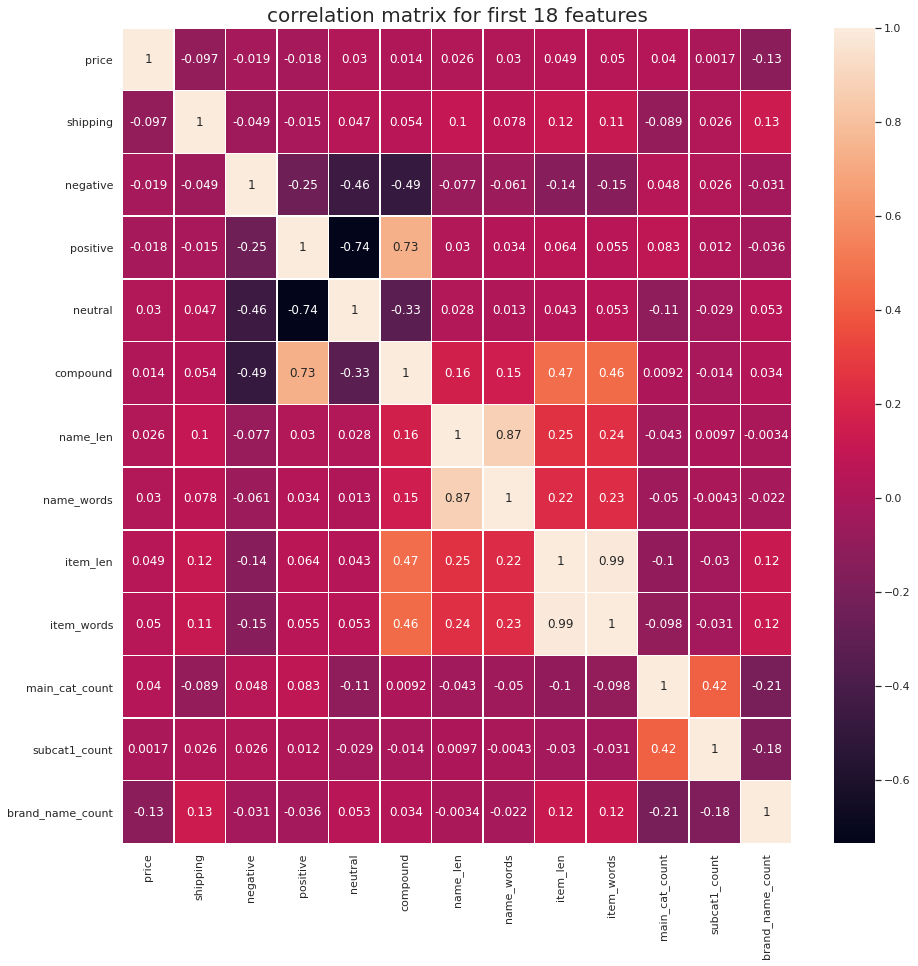

In [ ]:
columns = list(train.columns[2:21])
plt.figure(figsize = (15, 15))
plt.title("correlation matrix for first 18 features",fontsize=20)
sns.heatmap(train[columns].corr(), annot = True, linewidth = 0.5)
plt.show()

**Observation:**Seems that Sentiment scores are'nt much in trend with price, we will inpect further and remove them if necessary.

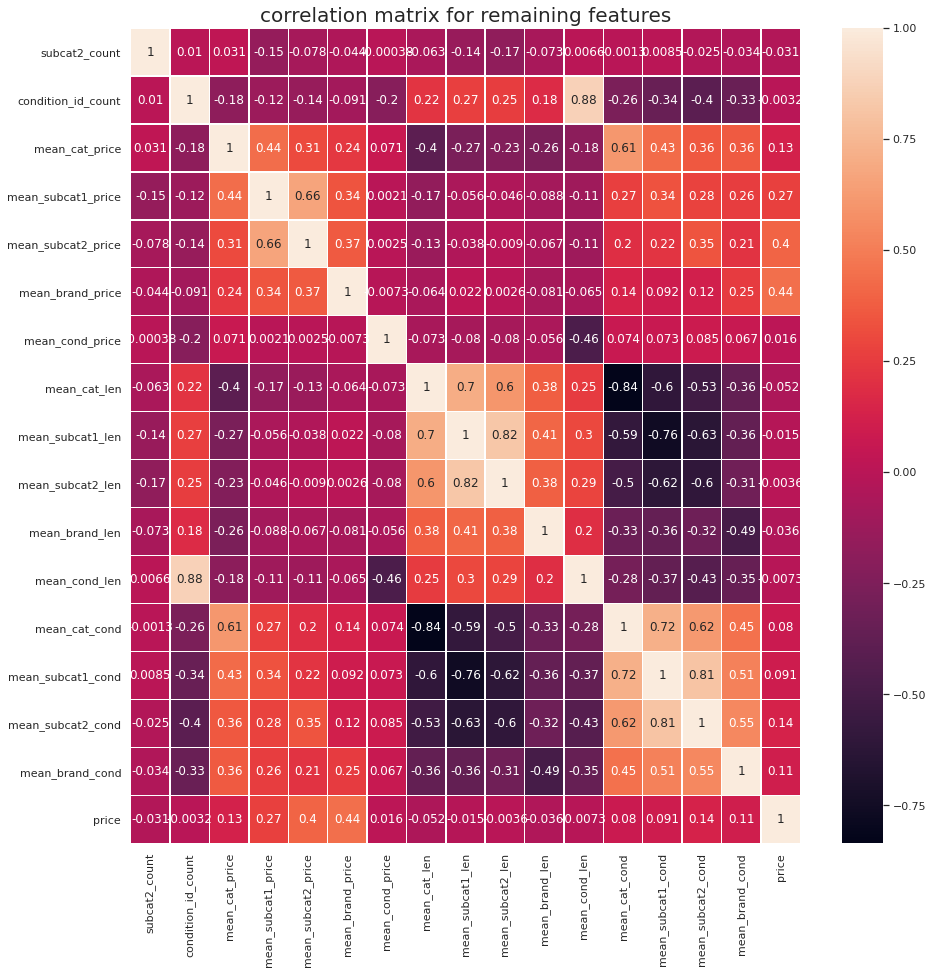

In [ ]:
columns = list(train.columns[21:])
columns.append('price')
plt.figure(figsize = (15, 15))
plt.title('correlation matrix for remaining features',fontsize=20)
sns.heatmap(train[columns].corr(), annot = True, linewidth = 0.5)
plt.show()

**observation:** Our new features like mean_price per all categorical features and mean_condition id for all categorical features showing some good correlation with price,so we will include these as features.

In [ ]:
train.columns

Index(['train_id', 'item_condition_id', 'brand_name', 'price', 'shipping',
       'main_cat', 'sub_cat1', 'sub_cat2', 'preprocessed_name',
       'preprocessed_description', 'name_len', 'name_words', 'item_len',
       'item_words', 'main_cat_count', 'brand_name_count', 'mean_cat_price',
       'mean_subcat1_price', 'mean_subcat2_price', 'mean_brand_price',
       'mean_cat_len', 'mean_brand_len', 'mean_cat_cond', 'mean_subcat1_cond',
       'mean_subcat2_cond', 'mean_brand_cond', 'median_brand_price',
       'median_maincat_price', 'median_subcat1_price', 'median_subcat2_price',
       'median_cond_price'],
      dtype='object')

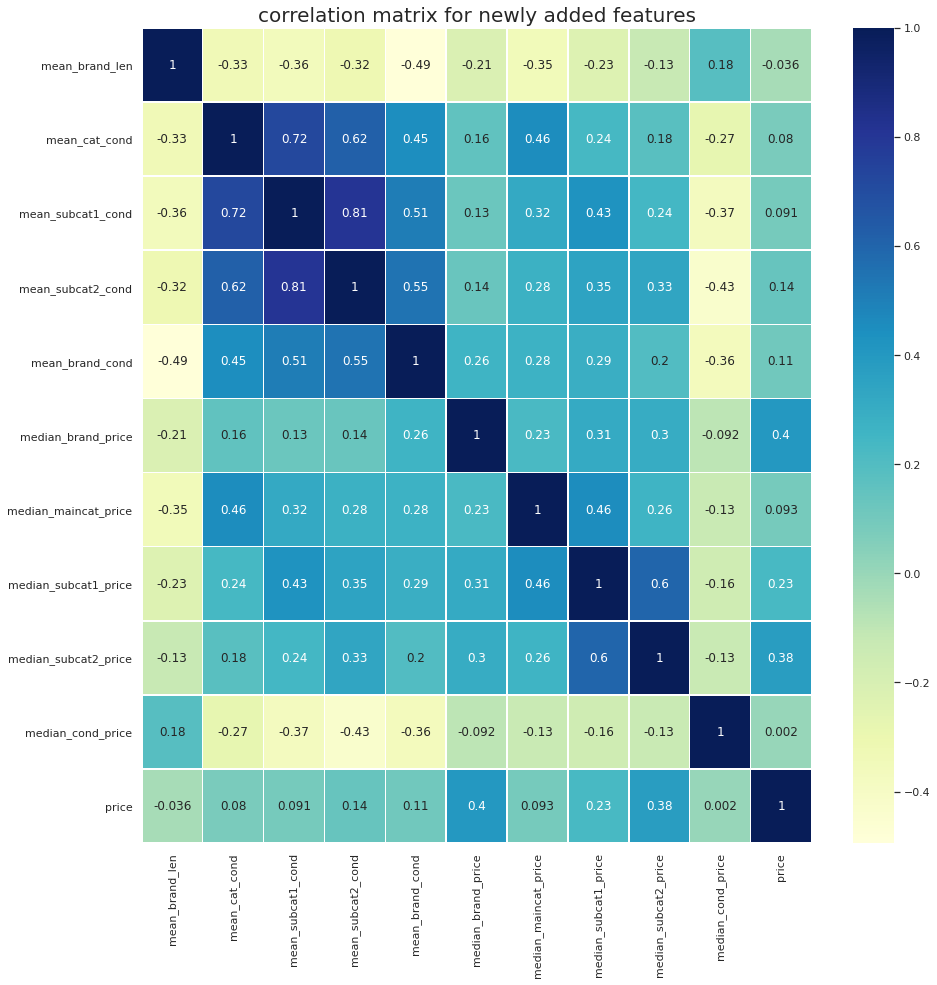

In [ ]:
columns = list(train.columns[21:31])
columns.append('price')
plt.figure(figsize = (15, 15))
plt.title("correlation matrix for newly added features",fontsize=20)
sns.heatmap(train[columns].corr(), annot = True, linewidth = 0.5, cmap="YlGnBu")
plt.show()

**Observation:** Newly added features showing good realtion with price value,lets try with log transformation of price.

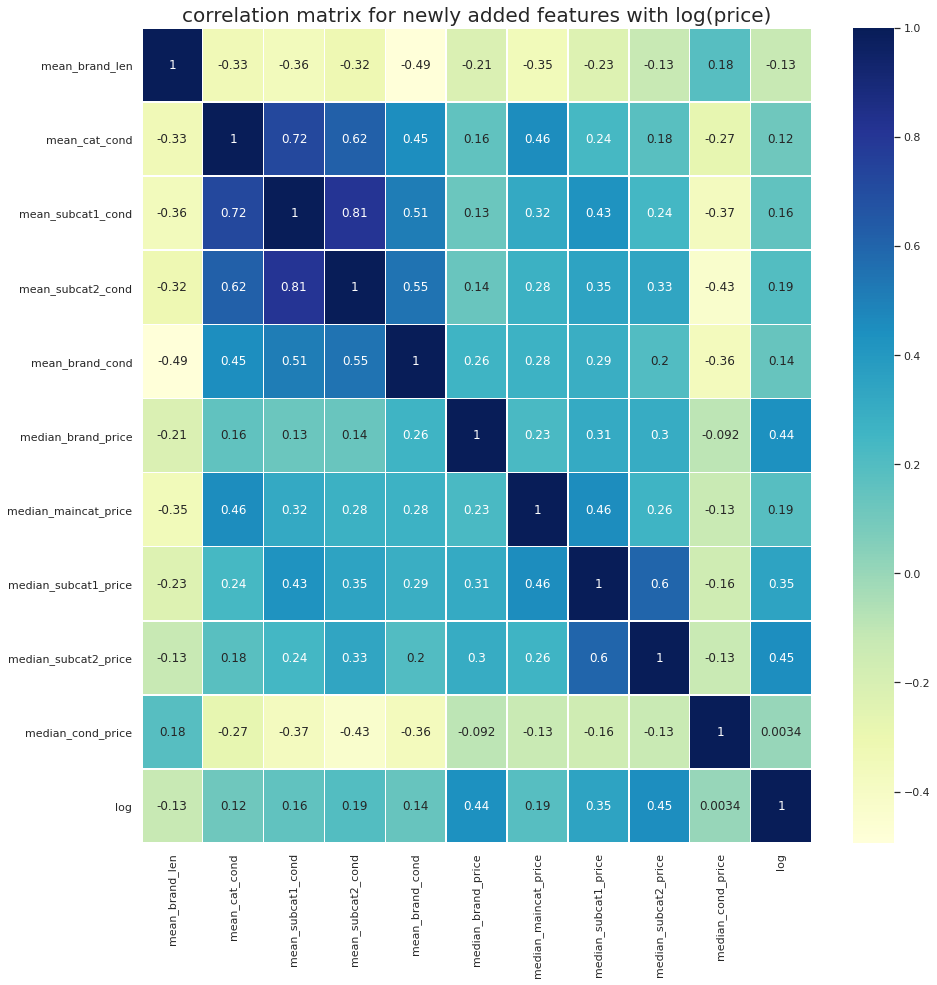

In [ ]:
columns = list(train.columns[21:])
plt.figure(figsize = (15, 15))
plt.title("correlation matrix for newly added features with log(price)",fontsize=20)
sns.heatmap(train[columns].corr(), annot = True, linewidth = 0.5, cmap="YlGnBu")
plt.show()

**Observation:** We can see that newly added variables with log transformation are showing good relation,so lets keep those features.

In [ ]:
#as some of the features are not contributing much, lets remove them
train.drop('negative',axis=1,inplace=True)
train.drop('positive',axis=1,inplace=True)
train.drop('neutral',axis=1,inplace=True)
train.drop('compound',axis=1,inplace=True)
test.drop('negative',axis=1,inplace=True)
test.drop('positive',axis=1,inplace=True)
test.drop('neutral',axis=1,inplace=True)
test.drop('compound',axis=1,inplace=True)

In [ ]:
train.drop('subcat1_count',axis=1,inplace=True)
test.drop('subcat1_count',axis=1,inplace=True)
train.drop('subcat2_count',axis=1,inplace=True)
test.drop('subcat2_count',axis=1,inplace=True)
train.drop('condition_id_count',axis=1,inplace=True)
test.drop('condition_id_count',axis=1,inplace=True)

In [ ]:
train.columns

Index(['train_id', 'item_condition_id', 'brand_name', 'price', 'shipping',
       'main_cat', 'sub_cat1', 'sub_cat2', 'preprocessed_name',
       'preprocessed_description', 'name_len', 'name_words', 'item_len',
       'item_words', 'main_cat_count', 'brand_name_count', 'mean_cat_price',
       'mean_subcat1_price', 'mean_subcat2_price', 'mean_brand_price',
       'mean_cat_len', 'mean_brand_len', 'mean_cat_cond', 'mean_subcat1_cond',
       'mean_subcat2_cond', 'mean_brand_cond', 'median_brand_price',
       'median_maincat_price', 'median_subcat1_price', 'median_subcat2_price',
       'median_cond_price'],
      dtype='object')

In [ ]:
train.drop('mean_cond_price',axis=1,inplace=True)
test.drop('mean_cond_price',axis=1,inplace=True)
train.drop('mean_subcat1_len',axis=1,inplace=True)
test.drop('mean_subcat1_len',axis=1,inplace=True)
train.drop('mean_subcat2_len',axis=1,inplace=True)
test.drop('mean_subcat2_len',axis=1,inplace=True)
train.drop('mean_cond_len',axis=1,inplace=True)
test.drop('mean_cond_len',axis=1,inplace=True)

In [ ]:
train.shape,test.shape

((1482535, 31), (3460725, 30))

### Encoding and Preprocessing of Features

In [ ]:
train.drop('train_id',axis=1,inplace=True) #drop id columns 
test.drop('test_id',axis=1,inplace=True)
train.to_csv('final_train.csv') #saving all the features 
test.to_csv('final_test.csv')

In [ ]:
import pandas as pd 
train = pd.read_csv('final_train.csv')

In [ ]:
train.head()

,Unnamed: 0,item_condition_id,brand_name,price,shipping,main_cat,sub_cat1,sub_cat2,preprocessed_name,preprocessed_description,name_len,name_words,item_len,item_words,main_cat_count,brand_name_count,mean_cat_price,mean_subcat1_price,mean_subcat2_price,mean_brand_price,mean_cat_len,mean_brand_len,mean_cat_cond,mean_subcat1_cond,mean_subcat2_cond,mean_brand_cond
0,0,3,unknown,10.0,1,men,tops,t_shirts,mlb cincinnati reds t shirt size xl,no description yet,35,7,18,3,93363,632682,34.693347,18.999442,19.132156,21.133453,89.481154,134.613612,2.148967,2.190472,2.089269,1.737056
1,1,3,razer,52.0,0,electronics,computers_tablets,components_parts,razer blackwidow chroma keyboard,this keyboard great condition works like came ...,32,4,130,21,119631,94,34.191769,97.877626,42.913900,45.021277,148.087762,116.808511,1.963463,2.295205,2.201245,2.414894
2,2,1,target,10.0,1,women,tops_blouses,blouse,ava viv blouse,adorable top hint lace key hole back the pale ...,14,3,79,16,664385,1868,28.885496,18.237514,15.659676,15.047109,99.812991,90.570128,2.026029,2.081002,2.167537,2.055139
3,3,1,unknown,35.0,1,home,home_d_cor,home_d_cor_accents,leather horse statues,new tags leather horses retail rm stand foot h...,21,3,120,21,67871,632682,24.536599,21.566301,22.185020,21.133453,125.917564,134.613612,1.547288,1.603065,1.633497,1.737056
4,4,1,unknown,44.0,0,women,jewelry,necklaces,24k gold plated rose,complete certificate authenticity,20,4,33,3,664385,632682,28.885496,27.501571,25.587509,21.133453,99.812991,134.613612,2.026029,1.707948,1.611550,1.737056


In [ ]:
train.isnull().any()#checking for null values

Unnamed: 0                  False
item_condition_id           False
brand_name                  False
price                       False
shipping                    False
main_cat                    False
sub_cat1                    False
sub_cat2                    False
preprocessed_name            True
preprocessed_description     True
name_len                    False
name_words                  False
item_len                    False
item_words                  False
main_cat_count              False
brand_name_count            False
mean_cat_price              False
mean_subcat1_price          False
mean_subcat2_price          False
mean_brand_price            False
mean_cat_len                False
mean_brand_len              False
mean_cat_cond               False
mean_subcat1_cond           False
mean_subcat2_cond           False
mean_brand_cond             False
median_brand_price          False
median_maincat_price        False
median_subcat1_price        False
median_subcat2

In [ ]:
df1 = train[train.isna().any(axis=1)] #getting the rows with null values
df1

In [ ]:
#In the original given data some of the rows have preprocessed_descriptions as : :))), !!! ,..., ... so when these are replaced in cleaning of texts, we got empty rows,
#because we skipped checking the empty rows after cleaning, it is better to cross check once here, so in this process, we found nan values for these empty rows.

In [ ]:
train.preprocessed_description.fillna(value = "not given", inplace = True) #filling null values
train.preprocessed_name.fillna(value = "unknown", inplace = True)

In [ ]:
test = pd.read_csv('final_test.csv')

In [ ]:
test.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
test.isnull().any()

item_condition_id           False
brand_name                  False
shipping                    False
main_cat                    False
sub_cat1                    False
sub_cat2                    False
preprocessed_name            True
preprocessed_description     True
name_len                    False
name_words                  False
item_len                    False
item_words                  False
main_cat_count              False
brand_name_count             True
mean_cat_price              False
mean_subcat1_price          False
mean_subcat2_price           True
mean_brand_price             True
mean_cat_len                False
mean_brand_len               True
mean_cat_cond               False
mean_subcat1_cond           False
mean_subcat2_cond            True
mean_brand_cond              True
median_brand_price           True
median_maincat_price        False
median_subcat1_price        False
median_subcat2_price         True
median_cond_price           False
dtype: bool

In [ ]:
test.preprocessed_description.fillna(value = "not given", inplace = True) #filling null values
test.preprocessed_name.fillna(value = "unknown", inplace = True)
test.brand_name_count.fillna(value = 0,inplace = True)
test.mean_brand_price.fillna(value = 0,inplace = True)
test.mean_subcat2_price.fillna(value = 0,inplace = True)
test.mean_brand_len.fillna(value = 0,inplace = True)
test.mean_subcat2_cond.fillna(value = 0,inplace = True)
test.mean_brand_cond.fillna(value = 0,inplace = True)
test.median_brand_price.fillna(value=0,inplace =True)
test.median_subcat2_price.fillna(value=0,inplace=True)

In [ ]:
test.isnull().any()

In [ ]:
train.drop('Unnamed: 0',axis=1,inplace=True)#dropping useless columns

In [ ]:
train.shape,test.shape

((1482535, 30), (3460725, 29))

In [ ]:
#train[['negative','positive','neutral','compound']].to_csv('sentr.csv') #as it is taking longer time saving only sentiment score values so that in case of runtime restart,it will be easy for us
#test[['negative','positive','neutral','compound']].to_csv('sentst.csv')

In [ ]:
x = train.drop('price', axis=1) #inputs and outputs
y = train['price']
x.shape,y.shape

((1482535, 29), (1482535,))

In [ ]:
#train and cv split
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x, y, test_size=0.1, random_state=33)

In [ ]:
x_train.to_csv('x_train.csv') #saving all train and cv features 
x_cv.to_csv('x_cv.csv')
y_train.to_csv('y_train.csv') 
y_cv.to_csv('y_cv.csv')

In [ ]:
x_train = pd.read_csv('x_train.csv')
x_cv = pd.read_csv('x_cv.csv')
y_train = pd.read_csv('y_train.csv')
y_cv = pd.read_csv('y_cv.csv')
x_train.shape,y_train.shape,x_cv.shape,y_cv.shape

((1334281, 30), (1334281, 2), (148254, 30), (148254, 2))

In [ ]:
del train
gc.collect()

196

In [ ]:
x_train.head() # 4 categorical+2categorical(conditionid and shippiing), 2 text  21 numerical

,item_condition_id,brand_name,shipping,main_cat,sub_cat1,sub_cat2,preprocessed_name,preprocessed_description,name_len,name_words,item_len,item_words,main_cat_count,brand_name_count,mean_cat_price,mean_subcat1_price,mean_subcat2_price,mean_brand_price,mean_cat_len,mean_brand_len,mean_cat_cond,mean_subcat1_cond,mean_subcat2_cond,mean_brand_cond,median_brand_price,median_maincat_price,median_subcat1_price,median_subcat2_price,median_condition_price
1186839,3,unknown,0,home,bedding,duvet_covers_sets,uo map duvet cover,no description yet,18,4,18,3,67871,632682,24.536599,30.688815,40.995652,21.133453,125.917564,134.613612,1.547288,1.621660,2.078261,1.737056,14.0,18.0,25.0,31.0,16.0
190363,1,unknown,0,handmade,bags_and_purses,purse,purses hold for ann,2 mickey purses,19,4,15,3,30840,632682,18.154410,61.790944,47.534107,21.133453,154.165532,134.613612,1.555026,2.283212,2.427189,1.737056,14.0,12.0,28.0,34.0,18.0
656522,3,my_little_pony,0,kids,toys,dolls_accessories,my little pony toy,10 pony figure 2 ponies mini pony bakery store...,18,4,56,11,171689,363,20.642315,21.522112,26.984882,17.495868,97.565196,102.382920,2.133503,1.877128,2.357598,2.388430,14.0,14.0,14.0,18.0,16.0
653312,3,victoria_s_secret,0,women,underwear,bras,vs 38d dream angels push up bra,a fun feminine push bra lace embroidery jewels...,31,7,164,27,664385,48036,28.885496,18.097813,18.636364,23.214287,99.812991,113.122762,2.026029,1.750000,2.027122,1.777896,19.0,19.0,14.0,15.0,16.0
842742,1,too_faced,0,beauty,makeup,makeup_palettes,too faced le grand holiday palette,includes limited edition le grand palais chris...,34,6,329,49,207828,5794,19.671536,18.686176,25.561430,22.477304,151.448222,121.088367,1.418943,1.432782,1.630163,1.554367,19.0,15.0,15.0,22.0,18.0


In [ ]:
x_train.drop('Unnamed: 0',axis=1,inplace=True)#dropping useless columns
x_cv.drop('Unnamed: 0',axis=1,inplace=True)#dropping useless columns
y_train.drop('Unnamed: 0',axis=1,inplace=True)#dropping useless columns
y_cv.drop('Unnamed: 0',axis=1,inplace=True)#dropping useless columns
x_train.shape,y_train.shape,x_cv.shape,y_cv.shape

((1334281, 29), (1334281, 1), (148254, 29), (148254, 1))

In [ ]:
#concatenating all the text data, these features are taken from https://www.kaggle.com/lopuhin/mercari-golf-0-3875-cv-in-75-loc-1900-s
x_train['name'] = x_train['preprocessed_name'].fillna('') + ' ' + x_train['brand_name'].fillna('')
x_train['text'] = (x_train['preprocessed_description'].fillna('') + ' ' + x_train['name'] + ' ' + x_train['main_cat'].fillna('') + x_train['sub_cat1'].fillna('')+x_train['sub_cat2'].fillna(''))

x_cv['name'] = x_cv['preprocessed_name'].fillna('') + ' ' + x_cv['brand_name'].fillna('')
x_cv['text'] = (x_cv['preprocessed_description'].fillna('') + ' ' + x_cv['name'] + ' ' + x_cv['main_cat'].fillna('') + x_cv['sub_cat1'].fillna('')+x_cv['sub_cat2'].fillna(''))

In [ ]:
x_train.drop('preprocessed_name',axis=1,inplace=True)#dropping useless columns
x_cv.drop('preprocessed_name',axis=1,inplace=True)#dropping useless columns
x_train.drop('preprocessed_description',axis=1,inplace=True)#dropping useless columns
x_cv.drop('preprocessed_description',axis=1,inplace=True)#dropping useless columns

In [ ]:
print("final shape of train and cv before encoding:")
x_train.shape,y_train.shape,x_cv.shape,y_cv.shape

final shape of train and cv before encoding:


((1334281, 29), (1334281, 1), (148254, 29), (148254, 1))

### encoding categorical feautures

Due to memory constraints in colab, we will first encode train and cv data and train the models and save the best models, then we will predict on test data

One hot Encoding of train and cv

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
#we use conunt vectorizer for text mainly, we can also use for categorical if our category column has only one word per row,whereas onehotencoder is used for category columns only
import pickle
vectorizer1 = CountVectorizer() #one hot encoding 
vectorizer1.fit(x_train['brand_name'].values)
pickle.dump(vectorizer1, open('v1.pkl','wb')) #saving the vectorizer model, so that we can transform on test data

In [ ]:
v1 = pickle.load(open('v1.pkl','rb'))
x_train_brand_ohe = v1.transform(x_train['brand_name'].values)
x_cv_brand_ohe = v1.transform(x_cv['brand_name'].values)
print("After vectorization")
print(x_train_brand_ohe.shape)
print(x_cv_brand_ohe.shape)
#print(vectorizer.get_feature_names())

After vectorization
(1334281, 4668)
(148254, 4668)


In [ ]:
vectorizer2 = CountVectorizer()
vectorizer2.fit(x_train['main_cat'].values)
pickle.dump(vectorizer2, open('v2.pkl','wb'))

In [ ]:
v2 = pickle.load(open('v2.pkl','rb'))
x_train_cat_ohe = v2.transform(x_train['main_cat'].values)
x_cv_cat_ohe = v2.transform(x_cv['main_cat'].values)
print("After vectorization")
print(x_train_cat_ohe.shape)
print(x_cv_cat_ohe.shape)
#print(vectorizer.get_feature_names())

After vectorization
(1334281, 11)
(148254, 11)


In [ ]:
vectorizer3 = CountVectorizer()
vectorizer3.fit(x_train['sub_cat1'].values)
pickle.dump(vectorizer3, open('v3.pkl','wb'))

In [ ]:
v3 = pickle.load(open('v3.pkl','rb'))
x_train_subcat1_ohe = v3.transform(x_train['sub_cat1'].values)
x_cv_subcat1_ohe = v3.transform(x_cv['sub_cat1'].values)
print("After vectorization")
print(x_train_subcat1_ohe.shape)
print(x_cv_subcat1_ohe.shape)
#print(vectorizer.get_feature_names())

After vectorization
(1334281, 114)
(148254, 114)


In [ ]:
vectorizer4 = CountVectorizer()
vectorizer4.fit(x_train['sub_cat2'].values)
pickle.dump(vectorizer4, open('v4.pkl','wb'))

In [ ]:
v4 = pickle.load(open('v4.pkl','rb'))
x_train_subcat2_ohe = v4.transform(x_train['sub_cat2'].values)
x_cv_subcat2_ohe = v4.transform(x_cv['sub_cat2'].values)
print("After vectorization")
print(x_train_subcat2_ohe.shape)
print(x_cv_subcat2_ohe.shape)
#print(vectorizer.get_feature_names())

After vectorization
(1334281, 861)
(148254, 861)


In [ ]:
from scipy.sparse import csr_matrix #convert remaining categorical columns sparse values
#https://stackoverflow.com/a/56567037 difference between get dummies and oncehot encoding in sklearn
x_train_dum = csr_matrix(pd.get_dummies(x_train[['item_condition_id', 'shipping']],sparse=True).values)
x_cv_dum = csr_matrix(pd.get_dummies(x_cv[['item_condition_id', 'shipping']],sparse=True).values)

Encoding Test data

In [ ]:
from scipy.sparse import csr_matrix
import pickle
v1 = pickle.load(open('v1.pkl','rb')) #load the respective saved modules and transform on test data
x_test_brand_ohe = v1.transform(test['brand_name'].values)

v2 = pickle.load(open('v2.pkl','rb'))
x_test_cat_ohe = v2.transform(test['main_cat'].values)

v3 = pickle.load(open('v3.pkl','rb'))
x_test_subcat1_ohe = v3.transform(test['sub_cat1'].values)

v4 = pickle.load(open('v4.pkl','rb'))
x_test_subcat2_ohe = v4.transform(test['sub_cat2'].values)

x_test_dum = csr_matrix(pd.get_dummies(test[['item_condition_id', 'shipping']],sparse=True).values)  
print(x_test_brand_ohe.shape)
print(x_test_cat_ohe.shape)
print(x_test_subcat1_ohe.shape)
print(x_test_subcat2_ohe.shape)                         

(3460725, 4668)
(3460725, 11)
(3460725, 114)
(3460725, 861)


### Standardising the numerical features

In [ ]:
x_train = pd.read_csv('x_train.csv')
x_cv = pd.read_csv('x_cv.csv')

In [ ]:
x_train.drop('Unnamed: 0',axis=1,inplace=True)
x_cv.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import StandardScaler 
standardiser = StandardScaler()
def standard(tr,cv,ts): #function for standardising the numerical features
  standardiser.fit(tr.values.reshape(-1,1)) #fitting on train data
  x_train_st = standardiser.transform(tr.values.reshape(-1,1))
  x_cv_st = standardiser.transform(cv.values.reshape(-1,1))
  x_test_st = standardiser.transform(ts.values.reshape(-1,1))
  return x_train_st,x_cv_st,x_test_st #return train and cv column values after standardising

In [ ]:
#get only numerical column names
col = list(set(x_train.columns) - {'item_condition_id', 'brand_name', 'shipping', 'main_cat', 'sub_cat1','sub_cat2', 'name', 'text'})

In [ ]:
x_tr_num = x_train[col] #new dataframes of train and cv with only numerical features
x_cv_num = x_cv[col]
#x_test_num = test[col]
for i in col: #for each numerical column in train and cv standardise it
  t,c,s = standard(x_train[i],x_cv[i],test[i])
  x_tr_num[i] = t #replace the column with standardised values
  x_cv_num[i] = c
  x_test_num[i] = s  

In [ ]:
np.save('x_tr_num', x_tr_num) #save standardised numerical values of train and cv for future use
np.save('x_cv_num', x_cv_num)
np.save('x_test_num', x_test_num)

In [ ]:
x_tr_num.shape,x_cv_num.shape#,x_test_num.shape

((1334281, 21), (148254, 21))

Text Encoding

Text Column

Using BOW vectorizer

Train and CV

In [ ]:
vectorizer_1 =  CountVectorizer(ngram_range=(1, 2), min_df=1,max_df = 1.0, max_features=200000)#taking 1 to 2 grams and limiting maximum features to 200000
vectorizer_1.fit(x_train['text'].values)
pickle.dump(vectorizer_1, open('text.pkl','wb'))#saving vectorizer to transfrom on test values

In [ ]:
vectorizer_1 = pickle.load(open('text.pkl','rb'))
x_train_text_bow = vectorizer_1.transform(x_train['text'].values) 
x_cv_text_bow = vectorizer_1.transform(x_cv['text'].values) #transform on cv and test
print("Shape of matrices after vectorization")
print(x_train_text_bow.shape, "\n", x_cv_text_bow.shape)

Shape of matrices after vectorization
(1334281, 200000) 
 (148254, 200000)


Using Tfidf vectorizer

Train and CV

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_1 =  TfidfVectorizer(ngram_range=(1, 2), min_df=1,max_df = 1.0, max_features=200000)#taking 1 to 2 grams and limiting maximum features to 200000
vectorizer_1.fit(x_train['text'].values)
pickle.dump(vectorizer_1, open('text.pkl','wb'))#saving vectorizer to transfrom on test values

In [ ]:
vectorizer_1 = pickle.load(open('text.pkl','rb'))
x_train_text_tfidf = vectorizer_1.transform(x_train['text'].values) 
x_cv_text_tfidf = vectorizer_1.transform(x_cv['text'].values) #transform on cv and test
print("Shape of matrices after vectorization")
print(x_train_text_tfidf.shape, "\n", x_cv_text_tfidf.shape)

Shape of matrices after vectorization
(1334281, 200000) 
 (148254, 200000)


Test Data

In [ ]:
v_1 = pickle.load(open('text.pkl','rb'))
x_test_item_tfidf = v_1.transform(test['text'].values)
x_test_item_tfidf.shape

Name column

Using BOW

In [ ]:
vectorizer_2 = CountVectorizer(ngram_range=(1, 2), min_df=1,max_df = 1.0, max_features=100000) #taking 1 to 2 grams with feature limit of 100000
vectorizer_2.fit(x_train['name'].values)
pickle.dump(vectorizer_2, open('name.pkl','wb'))

In [ ]:
vectorizer_2 = pickle.load(open('name.pkl','rb'))
x_train_name_bow = vectorizer_2.transform(x_train['name'].values) 
x_cv_name_bow = vectorizer_2.transform(x_cv['name'].values)
print("Shape of matrices after vectorization")
print(x_train_name_bow.shape, "\n", x_cv_name_bow.shape)

Shape of matrices after vectorization
(1334281, 100000) 
 (148254, 100000)


Using Tfidf

In [ ]:
vectorizer_2 = TfidfVectorizer(ngram_range=(1, 2), min_df=1,max_df = 1.0, max_features=100000) #taking 1 to 2 grams with feature limit of 100000
vectorizer_2.fit(x_train['name'].values)
pickle.dump(vectorizer_2, open('name.pkl','wb'))

In [ ]:
vectorizer_2 = pickle.load(open('name.pkl','rb'))
x_train_name_tfidf = vectorizer_2.transform(x_train['name'].values) 
x_cv_name_tfidf = vectorizer_2.transform(x_cv['name'].values)
print("Shape of matrices after vectorization")
print(x_train_name_tfidf.shape, "\n", x_cv_name_tfidf.shape)

Shape of matrices after vectorization
(1334281, 100000) 
 (148254, 100000)


Test Data

In [ ]:
v_2 = pickle.load(open('name.pkl','rb'))
x_test_name_tfidf = v_2.transform(test['name'].values) 
x_test_name_tfidf.shape

### Concatenate all the features to sparse matrix

Train and CV

In [ ]:
from scipy.sparse import hstack
# stack all categorical and text sparse matrices
x_train_sp_bow = hstack((x_train_brand_ohe, x_train_cat_ohe, x_train_subcat1_ohe, x_train_subcat2_ohe, \
               x_train_dum,x_train_name_bow,x_train_text_bow)).tocsr()

x_cv_sp_bow = hstack((x_cv_brand_ohe, x_cv_cat_ohe, x_cv_subcat1_ohe, x_cv_subcat2_ohe, \
               x_cv_dum,x_cv_name_bow,x_cv_text_bow)).tocsr()


In [ ]:
from scipy.sparse import hstack
# stack all categorical and text sparse matrices
x_train_sp_tfidf = hstack((x_train_brand_ohe, x_train_cat_ohe, x_train_subcat1_ohe, x_train_subcat2_ohe, \
               x_train_dum,x_train_name_tfidf,x_train_text_tfidf)).tocsr()

x_cv_sp_tfidf = hstack((x_cv_brand_ohe, x_cv_cat_ohe, x_cv_subcat1_ohe, x_cv_subcat2_ohe, \
               x_cv_dum,x_cv_name_tfidf,x_cv_text_tfidf)).tocsr()


In [ ]:
#scipy.sparse.save_npz("x_train_sp.npz", x_train_sp)#saving the sparse matrix for future use
#scipy.sparse.save_npz("x_cv_sp.npz", x_cv_sp)

Test Data

In [ ]:
from scipy.sparse import hstack
x_test_sp = hstack((x_test_brand_ohe, x_test_cat_ohe, x_test_subcat1_ohe, x_test_subcat2_ohe,\
               x_test_dum,x_test_name_tfidf,x_test_item_tfidf)).tocsr()

In [ ]:
#scipy.sparse.save_npz("x_test_sp.npz", x_test_sp)

Final Data

In [ ]:
# stack dense features with sparse matrix of categorical and text vectors
#final data sets:
X_train_bow = hstack((temp1, x_train_sp_bow)).tocsr()
X_cv_bow = hstack((temp2, x_cv_sp_bow)).tocsr()

In [ ]:
# stack dense features with sparse matrix of categorical and text vectors
#final data sets:
X_train_tfidf = hstack((temp1, x_train_sp_tfidf)).tocsr()
X_cv_tfidf = hstack((temp2, x_cv_sp_tfidf)).tocsr()

In [ ]:
#after detailed data analysis and referring similar kaggle problems and from correlation matrix above proved that there is exponential relation between the features and price,so it makes sense to
#to transform price to log(price), as there are values with 0 in price, add 1 - log(price+1)
#i tried with only price variable and the linear models like ridge and svr are performing very poorly and if we take log(price+1) as output,there is drastic improvement in the performance
#its all about experimentation, log worked for this problem, depending on the problem we may have to do exponential and quadratic transformations of both inputs and in some cases output also
y_train = np.log1p(y_train)
y_cv = np.log1p(y_train)
y_train.shape,y_cv.shape

((1334281, 1), (1334281, 1))

In [ ]:
#scipy.sparse.save_npz("X_train.npz", X_train)
#scipy.sparse.save_npz("X_cv.npz", X_cv)
#print('Final Train size: {}, Final CV size: {} ' .format(X_train_tfidf.shape, X_cv_tfidf.shape))

Final Train size: (1334281, 305677), Final CV size: (148254, 305677) 


Test Data

In [ ]:
#X_test = hstack((temp3.values, x_test_sp)).tocsr()
#scipy.sparse.save_npz("X_test.npz", X_test)

## Modelling

Preparing the final dataset with basic modelling:we will try our BOW,Tfidf encodings and at the end,as the dataset is large, we will pick only top features to our final dataset.

## Ridge Regression

In [ ]:
#function to calculate rmsle score
import math
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    y_pred[y_pred<0] = 0 #if predicted values are negative,replace them with zero https://www.kaggle.com/c/bike-sharing-demand/discussion/18942
    to_sum = [(math.log(y_pred[j] + 1) - math.log(y[j] + 1)) ** 2.0 for j,pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y))) ** 0.5

BOW

In [1]:
#as their is memory constraints in google colab, i have tuned hyper parameters without grid search or random search
alpha = [0.0001, 0.001, 0.01, 0.1, 1 ,10, 100]
score = []
for i in alpha:
  ridge_reg = Ridge(solver = "lsqr", fit_intercept=False,alpha=i)
  ridge_reg.fit(X_train_bow, y_train)
  pred_cv = ridge_reg.predict(X_cv_bow)
  r = rmsle(np.expm1(y_cv),np.expm1(pred_cv))
  #del ridge_reg,pred_cv
  #gc.collect()
  score.append(r)
  print("For alpha value of ", i,"      RMSLE:", r)

For alpha value of  0.0001  RMSLE: 0.57261784388924685
For alpha value of  0.001   RMSLE: 0.5573066331280245
For alpha value of  0.01    RMSLE: 0.556277267952677
For alpha value of  0.1     RMSLE: 0.54311250016855
For alpha value of  1       RMSLE: 0.5477924928285303
For alpha value of  10      RMSLE: 0.5523610223771576
For alpha value of  100     RMSLE: 0.5569451637570476


Tfidf

In [ ]:
#as their is memory constraints in google colab, i have tuned hyper parameters without grid search or random search
alpha = [0.0001, 0.001, 0.01, 0.1, 1 ,10, 100]
score = []
for i in alpha:
  ridge_reg = Ridge(solver = "lsqr", fit_intercept=False,alpha=i)
  ridge_reg.fit(X_train_tfidf, y_train)
  pred_cv = ridge_reg.predict(X_cv_tfidf)
  r = rmsle(np.expm1(y_cv),np.expm1(pred_cv))
  #del ridge_reg,pred_cv
  #gc.collect()
  score.append(r)
  print("For alpha value of ", i,"      RMSLE:", r)

For alpha value of  0.0001  RMSLE: 0.4686178438892468
For alpha value of  0.001   RMSLE: 0.4624073014728065
For alpha value of  0.01    RMSLE: 0.461926186837584
For alpha value of  0.1     RMSLE: 0.46061784388924685
For alpha value of  1       RMSLE: 0.45825374640760236
For alpha value of  10      RMSLE: 0.45924933086190818
For alpha value of  100     RMSLE: 0.45967948457505384


**Observation:** We can observe that there is significant improvement when you use the tfidf encoding and as tfidf is better than bow,lets proceed with tfidf vectorisation for final data.

## Final Data

As the data set size is very large,it's taking long time to train and test, so lets pick only 150000 top features and train the models.We will use selectkbest from sklearn which is one of the popular ways of selecting top features.

In [ ]:
#as dataset is large, taking only best features from sparse columns
from sklearn.feature_selection.univariate_selection import SelectKBest, f_regression

fselect = SelectKBest(f_regression, k=150000) #select top 150000 features
fselect.fit(x_train_sp_tfidf, y_train)
pickle.dump(fselect, open('fs.pkl','wb')) #save model to get the same features on final test data later

fselect = pickle.load(open('fs.pkl','rb'))
x_tsp_new = fselect.transform(x_train_sp_tfidf)
x_csp_new = fselect.transform(x_cv_sp_tfidf)

In [ ]:
x_tsp_new.shape,x_csp_new.shape

((1334281, 150000), (148254, 150000))

In [ ]:
# stack dense numeric features matrix with fianl categorical and text vectors
from scipy.sparse import hstack
X_train_new = hstack((temp1, x_tsp_new)).tocsr()
X_cv_new = hstack((temp2, x_csp_new)).tocsr()

In [ ]:
print("final train and cv data shapes:",X_train_new.shape,X_cv_new.shape)

final train and cv data shapes: (1334281, 150021) (148254, 150021)


In [ ]:
#saving the final data sets
scipy.sparse.save_npz("X_train.npz", X_train_new)
scipy.sparse.save_npz("X_cv.npz", X_cv_new)

Saving all the data to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!cp X_train.npz "drive/My Drive/"
!cp X_cv.npz "drive/My Drive/"
!cp y_train.csv "drive/My Drive/"
!cp y_cv.csv "drive/My Drive/"

Final Observations Before procedding to final modelling:

*   Tried pre trained BERT model to get sentence embeddings,but due to memory constraints in colab,session was crashed.Even making the maximum length of sentences in input to 30 was unsuccesful and if we further reduce the maximum length,it will be useless as we are loosing lot of text data,it wont be worth to train the models with so much less data.I have even tried distilBERT,which is lite version of BERT,but same problem persisted.so didn't attempt BERT vectors,but if we have memory resources,we should try once.

*   Tried using pre trained Word2vec vectors using glove,but due to the same reasons,we skipped this.Even after trying with reduced dimensions and taking less data,memory issue was still there and if we further reduce dimesnions and data,model wont perform well,as we have less dimensions,there is lack of contextual information,so it wasn't performing even as tfidf.

*   As using price variable is not yielding good results,from some of the similar problem references,we have taken log transformation of price and the model performance has improved significantly, this concludes the relation between the given features and price is not linear and is close to exponential trend.

*   We tried with bag of words and tfidf encodings, we have seen that tfidf encodings has improved the performance significantly,so lets proceed with the modelling part woth tfidf vectorisations of text data.



